# Final Compiled Notebook

All the imports we need:

In [1]:
import numpy as np
from matplotlib import rc
rc('animation', html='jshtml')
#functions / classes we have made
from schrodinger_class import Schrodinger
from wigner_function import wigner_plot
from animate_wave import save_wave
from animate_wigner import anim_wigner

## Single Gaussain Barrier with Single Gaussian Wave with $E< V_{0}$

The energy of the wave is $E=\frac{1}{2m}p^{2}$, where $p$ is the momentum.

The max energy of the potential is $V_{0}$

So we have set $p_{0} = \sqrt{2m\frac{3}{4}V_{0}}$

#### Run this Cell to save the wave evolution information in the object S

In [2]:
#specify x grid
N = 2 ** 11 #2048
dx = 0.1
x = dx * (np.arange(N) - 0.5 * N)
dy = dx
y = x

#potential barrier
def gauss_barrier(x, a, x0):
    x = np.asarray(x)
    return (a * np.sqrt(np.pi))** (-0.5) * np.exp(-0.5 * ((x - x0)*1./a) ** 2)

V_x = gauss_barrier(x, 3, 0)
V0 = np.max(V_x)

#potential 'walls' at either end
V_x[x < -98] = 1E6 
V_x[x > 98] = 1E6

#variables
dt = 0.01
N_steps = 50
t_max = 200
frames = 151

#specifying constants
hbar = 1.0  
m = 1.0 #mass    
p0 = np.sqrt(2 * m  * 0.75 * V0) #intial momentum
k0 = p0 / hbar #intial wave number
v0 = p0 / m #initial velocity
d = 4.0 #initial width of wavepacket
x0 = -20 #initial centre of wavepacket 
k0_ft_y = -np.pi / dy

#wavefunction
def gauss_x(x, a, x0, k0):
    #wave with width a, centred at x0 with momentum k0
    return((a * np.sqrt(np.pi)) ** (-0.5) * np.exp(-0.5 * ((x - x0) * 1. / a) ** 2 + 1j * x * k0))

psi_x0 = gauss_x(x, d, x0, k0)


#creating the schrodinger object
S = Schrodinger(x=x, psi_x0=psi_x0, V_x=V_x, hbar=hbar, m=m, k0=-28)

#### Run this cell to play / save the wave animation

Frames folder found, overwritting


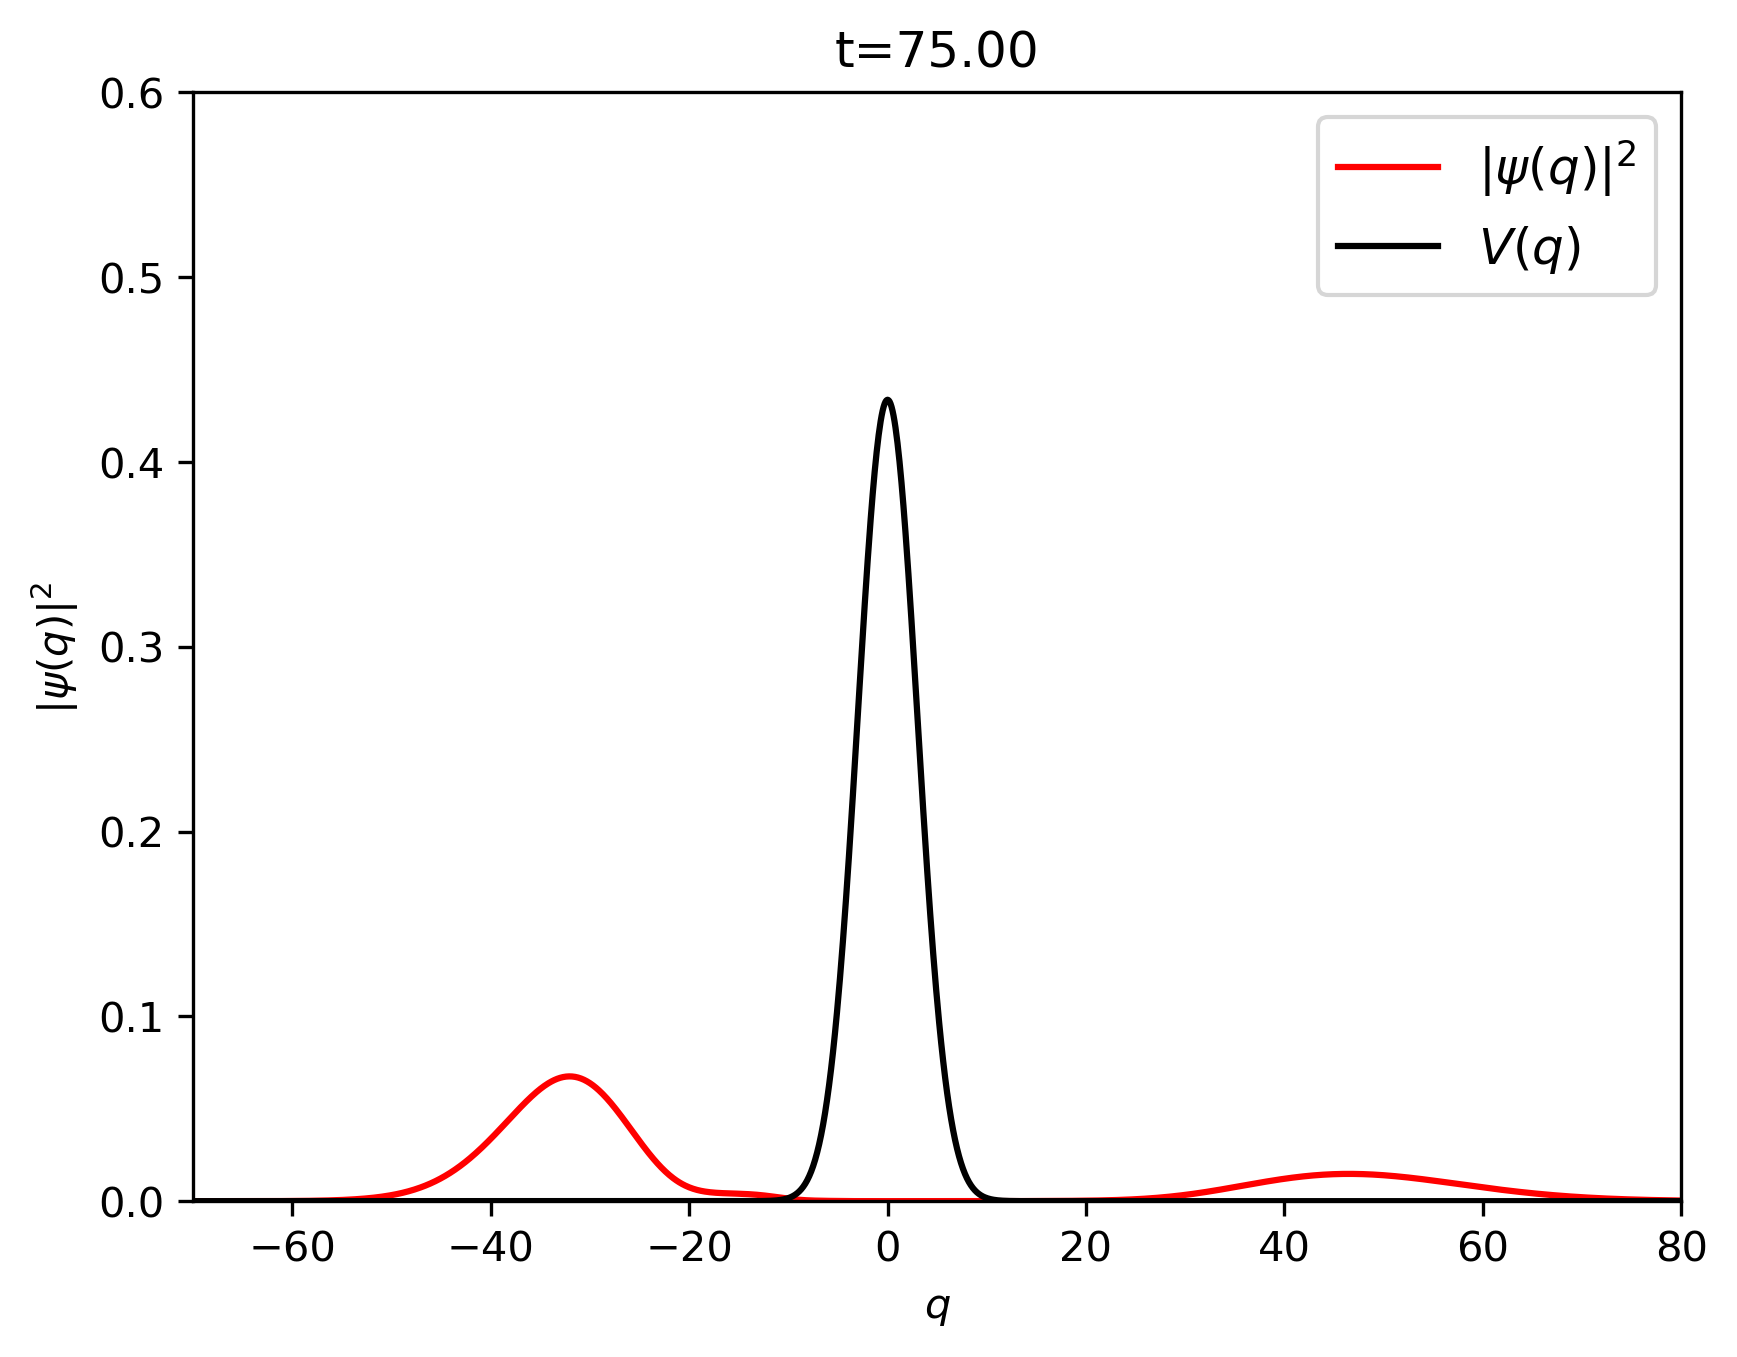

In [5]:
#creating the wave animation
#do save = 'True' to save or save='False' to play it in the notebook
xlim = (-70, 80)
ylim = (0,0.6)
save_wave(xlim=xlim, ylim=ylim, S=S, frames=frames, dt=dt, N_steps=N_steps, name='single_barrier_below', scaling = 1.5, save=True)

#### Run this cell to save the Wigner animation

Warning: it takes ages

In [3]:
#creating the wigner plot frames
xmin = -70
xmax = 80
ymin = -25
ymax = 25
psi_x0_input = psi_x0
for frame in range(frames):
    S = Schrodinger(x=x, psi_x0=psi_x0_input, V_x=V_x, hbar=hbar, m=m, k0=-28.0)
    wigner_plot(psi_x0_input, x, y, dx, dy, k0_ft_y, t_max, view = 230, limit = 10, xmin = xmin, xmax = xmax, ymin=ymin, ymax=ymax, save_fig = True, frame_num = frame, density = True, surface = False)
    S.time_step(dt, N_steps)
    psi_x0_input = S.psi_x
    
    
#animating the wigner plot frames
anim_wigner(density = True, surface = False)


Frames folder found, overwritting


## Single Gaussian Barrier with Single Gaussian Wave with $E=V_{0}$

The energy of the wave is $E=\frac{1}{2m}p^{2}$, where $p$ is the momentum.

The max energy of the potential is $V_{0}$

Hence we have set $p_{0} = \sqrt{2mV_{0}}$

#### Run this Cell to save the wave evolution information in the object S

In [6]:
#specify x grid
N = 2 ** 11 #2048
dx = 0.1
x = dx * (np.arange(N) - 0.5 * N)
dy = dx
y = x

#potential barrier
def gauss_barrier(x, a, x0):
    x = np.asarray(x)
    return (a * np.sqrt(np.pi))** (-0.5) * np.exp(-0.5 * ((x - x0)*1./a) ** 2)

V_x = gauss_barrier(x, 3, 0)
V0 = np.max(V_x)

#potential 'walls' at either end
V_x[x < -98] = 1E6 
V_x[x > 98] = 1E6

#variables
dt = 0.01
N_steps = 50
t_max = 200
frames = 151

#specifying constants
hbar = 1.0  
m = 1.0 #mass    
p0 = np.sqrt(2 * m  * V0) #intial momentum
k0 = p0 / hbar #intial wave number
v0 = p0 / m #initial velocity
d = 4.0 #initial width of wavepacket
x0 = -20 #initial centre of wavepacket 
k0_ft_y = -np.pi / dy

#wavefunction
def gauss_x(x, a, x0, k0):
    #wave with width a, centred at x0 with momentum k0
    return((a * np.sqrt(np.pi)) ** (-0.5) * np.exp(-0.5 * ((x - x0) * 1. / a) ** 2 + 1j * x * k0))

psi_x0 = gauss_x(x, d, x0, k0)


#creating the schrodinger object
S = Schrodinger(x=x, psi_x0=psi_x0, V_x=V_x, hbar=hbar, m=m, k0=-28)

#### Run this cell to save the wave animation

Frames folder found, overwritting


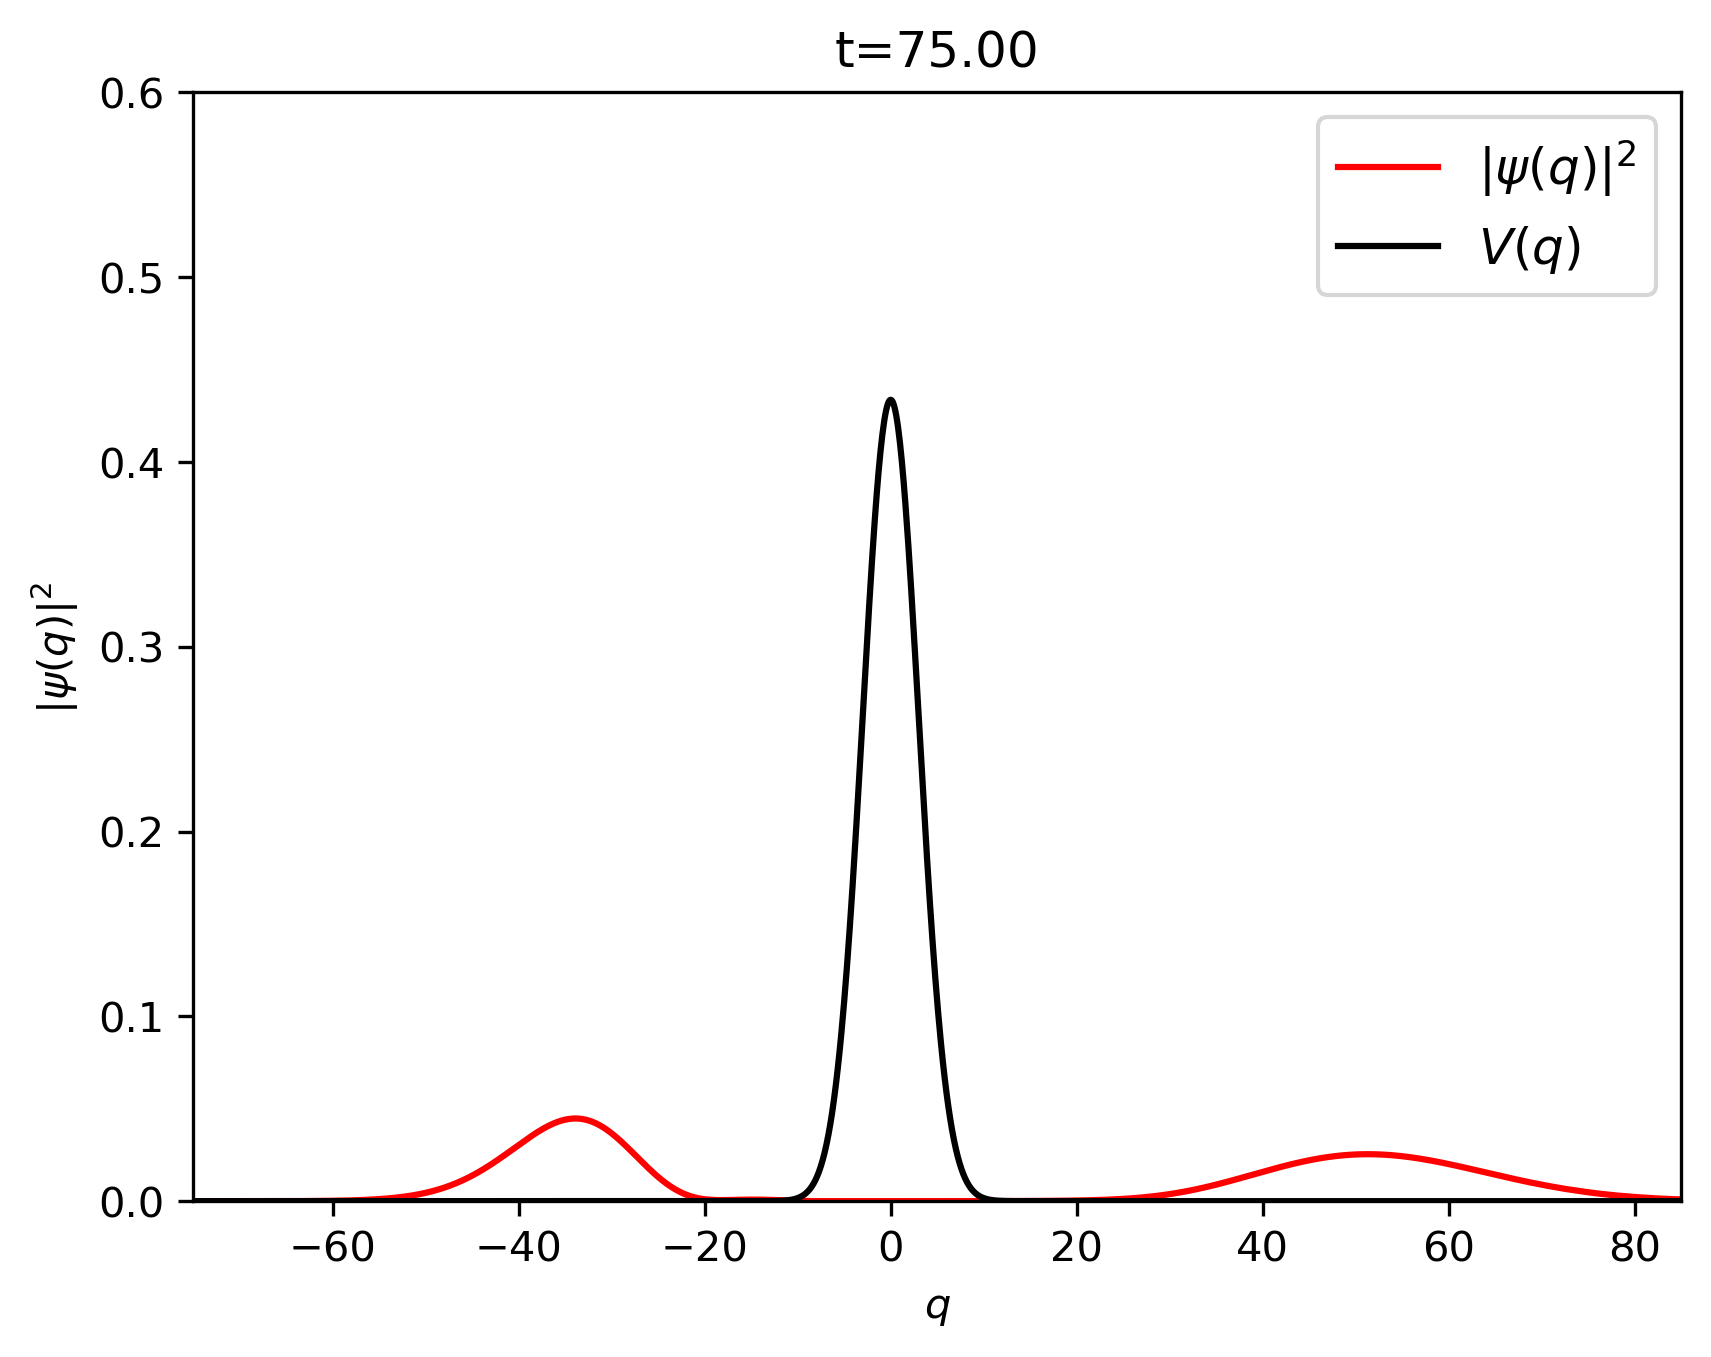

In [7]:
#creating the wave animation
xlim = (-75, 85)
ylim = (0,0.6)
save_wave(xlim=xlim, ylim=ylim, S=S, frames=frames, dt=dt, N_steps=N_steps, name='single_barrier_equal', scaling = 1.5, save=True)

#### Run this cell to save the Wigner animation

In [9]:
#creating the wigner plot frames
#we can do either the desnity plot, or the surface plot, or both
xmin = -75
xmax = 85
ymin = -25
ymax = 25
psi_x0_input = psi_x0
for frame in range(frames):
    S = Schrodinger(x=x, psi_x0=psi_x0_input, V_x=V_x, hbar=hbar, m=m, k0=-28.0)
    wigner_plot(psi_x0_input, x, y, dx, dy, k0_ft_y, t_max, view = 230, limit = 10, xmin = xmin, xmax = xmax, ymin=ymin, ymax=ymax save_fig = True, frame_num = frame, density = True, surface = False)
    S.time_step(dt, N_steps)
    psi_x0_input = S.psi_x
    
    
#animating the wigner plot frames
anim_wigner(density = True, surface = False)

## Single Gaussian Potential with Gaussian Wave with $E>V_{0}$

The energy of the wave is $E=\frac{1}{2m}p^{2}$, where $p$ is the momentum.

The max energy of the potential is $V_{0}$

Hence we have set $p_{0} = \sqrt{2m\frac{5}{4}V_{0}}$

#### Run this Cell to save the wave evolution information in the object S

In [13]:
#specify x grid
N = 2 ** 11 #2048
dx = 0.1
x = dx * (np.arange(N) - 0.5 * N)
dy = dx
y = x

#potential barrier
def gauss_barrier(x, a, x0):
    x = np.asarray(x)
    return (a * np.sqrt(np.pi))** (-0.5) * np.exp(-0.5 * ((x - x0)*1./a) ** 2)

V_x = gauss_barrier(x, 3, 0)
V0 = np.max(V_x)

#potential 'walls' at either end
V_x[x < -98] = 1E6 
V_x[x > 110] = 1E6

#variables
dt = 0.01
N_steps = 50
t_max = 200
frames = 151

#specifying constants
hbar = 1.0  
m = 1.0 #mass    
p0 = np.sqrt(2 * m  * 1.25 * V0) #intial momentum
k0 = p0 / hbar #intial wave number
v0 = p0 / m #initial velocity
d = 4.0 #initial width of wavepacket
x0 = -20 #initial centre of wavepacket 
k0_ft_y = -np.pi / dy

#wavefunction
def gauss_x(x, a, x0, k0):
    #wave with width a, centred at x0 with momentum k0
    return((a * np.sqrt(np.pi)) ** (-0.5) * np.exp(-0.5 * ((x - x0) * 1. / a) ** 2 + 1j * x * k0))

psi_x0 = gauss_x(x, d, x0, k0)


#creating the schrodinger object
S = Schrodinger(x=x, psi_x0=psi_x0, V_x=V_x, hbar=hbar, m=m, k0=-28)

0.43366253529203874


#### Run this cell to save the wave animation

Frames folder found, overwritting


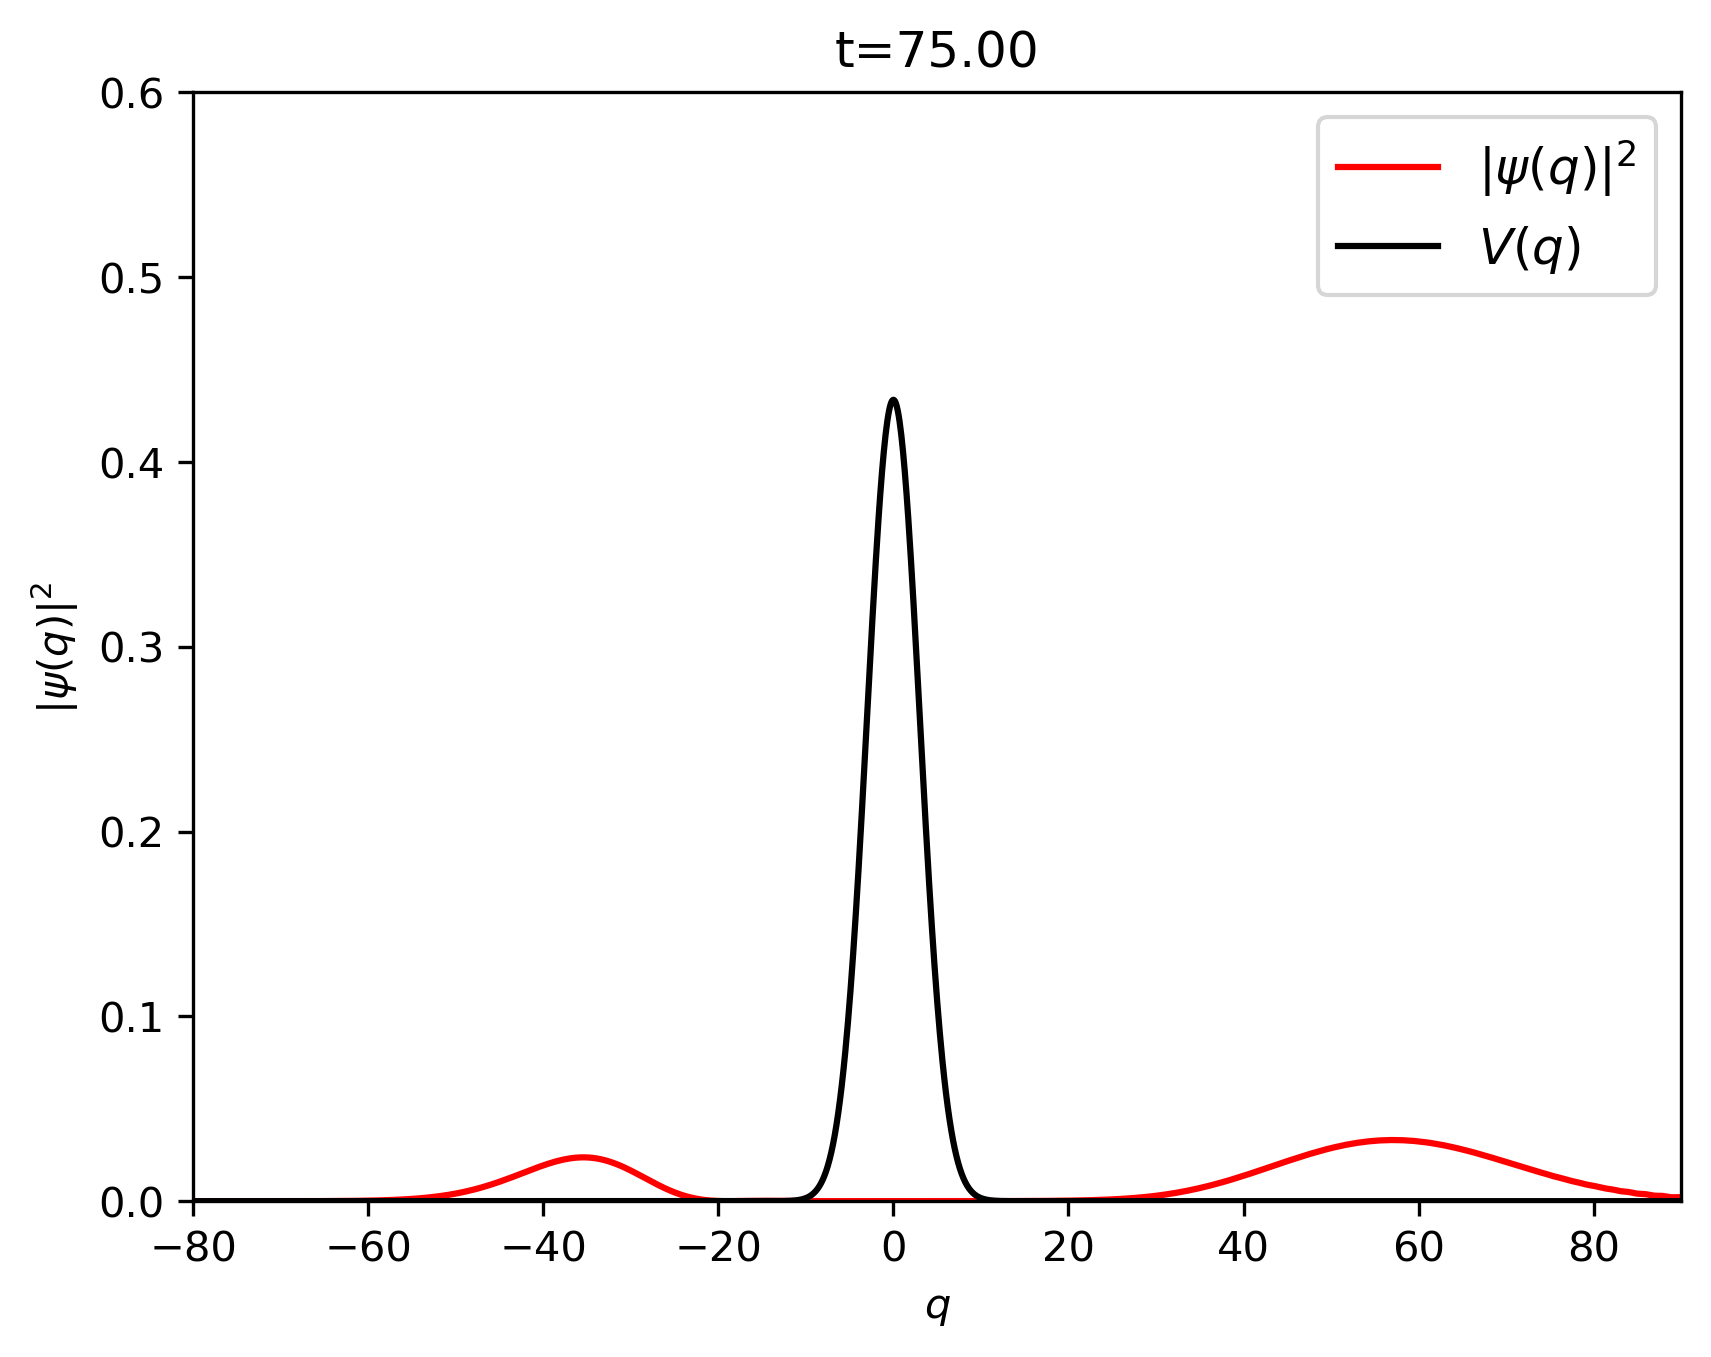

In [24]:
#creating the wave animation
xlim = (-80, 90)
ylim = (0,0.6)
ymin = -25
ymax = 25
save_wave(xlim=xlim, ylim=ylim, S=S, frames=frames, dt=dt, N_steps=N_steps, name='single_barrier_above', scaling = 1.5, save=True)

#### Run this cell to save the Wigner animation

In [12]:
#creating the wigner plot frames
#we can do either the desnity plot, or the surface plot, or both
xmin = -80
xmax = 90
psi_x0_input = psi_x0
for frame in range(frames):
    S = Schrodinger(x=x, psi_x0=psi_x0_input, V_x=V_x, hbar=hbar, m=m, k0=-28.0)
    wigner_plot(psi_x0_input, x, y, dx, dy, k0_ft_y, t_max, view = 230, limit = 10, xmin = xmin, xmax = xmax, ymin=ymin, ymax=ymax, save_fig = True, frame_num = frame, density = True, surface = False)
    S.time_step(dt, N_steps)
    psi_x0_input = S.psi_x
    
    
#animating the wigner plot frames
anim_wigner(density = True, surface = False)

Other potentials to do:

1. Double Gaussian
2. Double Gaussian with one higher than the other
3. W type well
4. Infinite step potential
5. Reactangular potential

Extra one for Wigner function:
1. Two waves in opposite directions  

# Single Step Potential with Gaussian Wave

Consider the potential barrier \begin{equation} V(q) = \begin{cases} 0 & \text{if} \hspace{5mm} q<0 \\
V_{0} & \text{if} \hspace{5mm} q>0 \end{cases} \end{equation}

### Wave Energy $E<V_{0}$

Set $p_{0} = \sqrt{2m\frac{3}{4}V_{0}}$

#### Run this Cell to save the wave evolution information in the object S

In [4]:
#specify x grid
N = 2 ** 11 #2048
dx = 0.1
x = dx * (np.arange(N) - 0.5 * N)
dy = dx
y = x

#potential barrier
def step_barrier(x, a, V0):
    potential = np.zeros(len(x))
    for i in range(len(x)):
        if x[i]<a:
            potential[i] = 0
        if x[i]>= a:
            potential[i] = V0
    return potential

V0 = 0.5
a = 0
V_x = step_barrier(x,a,V0)

#potential 'walls' at either end
V_x[x < -120] = 1E6 
V_x[x > 120] = 1E6

#variables
dt = 0.01
N_steps = 50
t_max = 200
frames = 151

#specifying constants
hbar = 1.0  
m = 1.0 #mass    
p0 = np.sqrt(2 * m  * 0.75 * V0) #intial momentum
k0 = p0 / hbar #intial wave number
v0 = p0 / m #initial velocity
d = 4.0 #initial width of wavepacket
x0 = -20 #initial centre of wavepacket 
k0_ft_y = -np.pi / dy

#wavefunction
def gauss_x(x, a, x0, k0):
    #wave with width a, centred at x0 with momentum k0
    return((a * np.sqrt(np.pi)) ** (-0.5) * np.exp(-0.5 * ((x - x0) * 1. / a) ** 2 + 1j * x * k0))

psi_x0 = gauss_x(x, d, x0, k0)

#creating the schrodinger object
S = Schrodinger(x=x, psi_x0=psi_x0, V_x=V_x, hbar=hbar, m=m, k0=-28)

#### Run this cell to save the wave animation

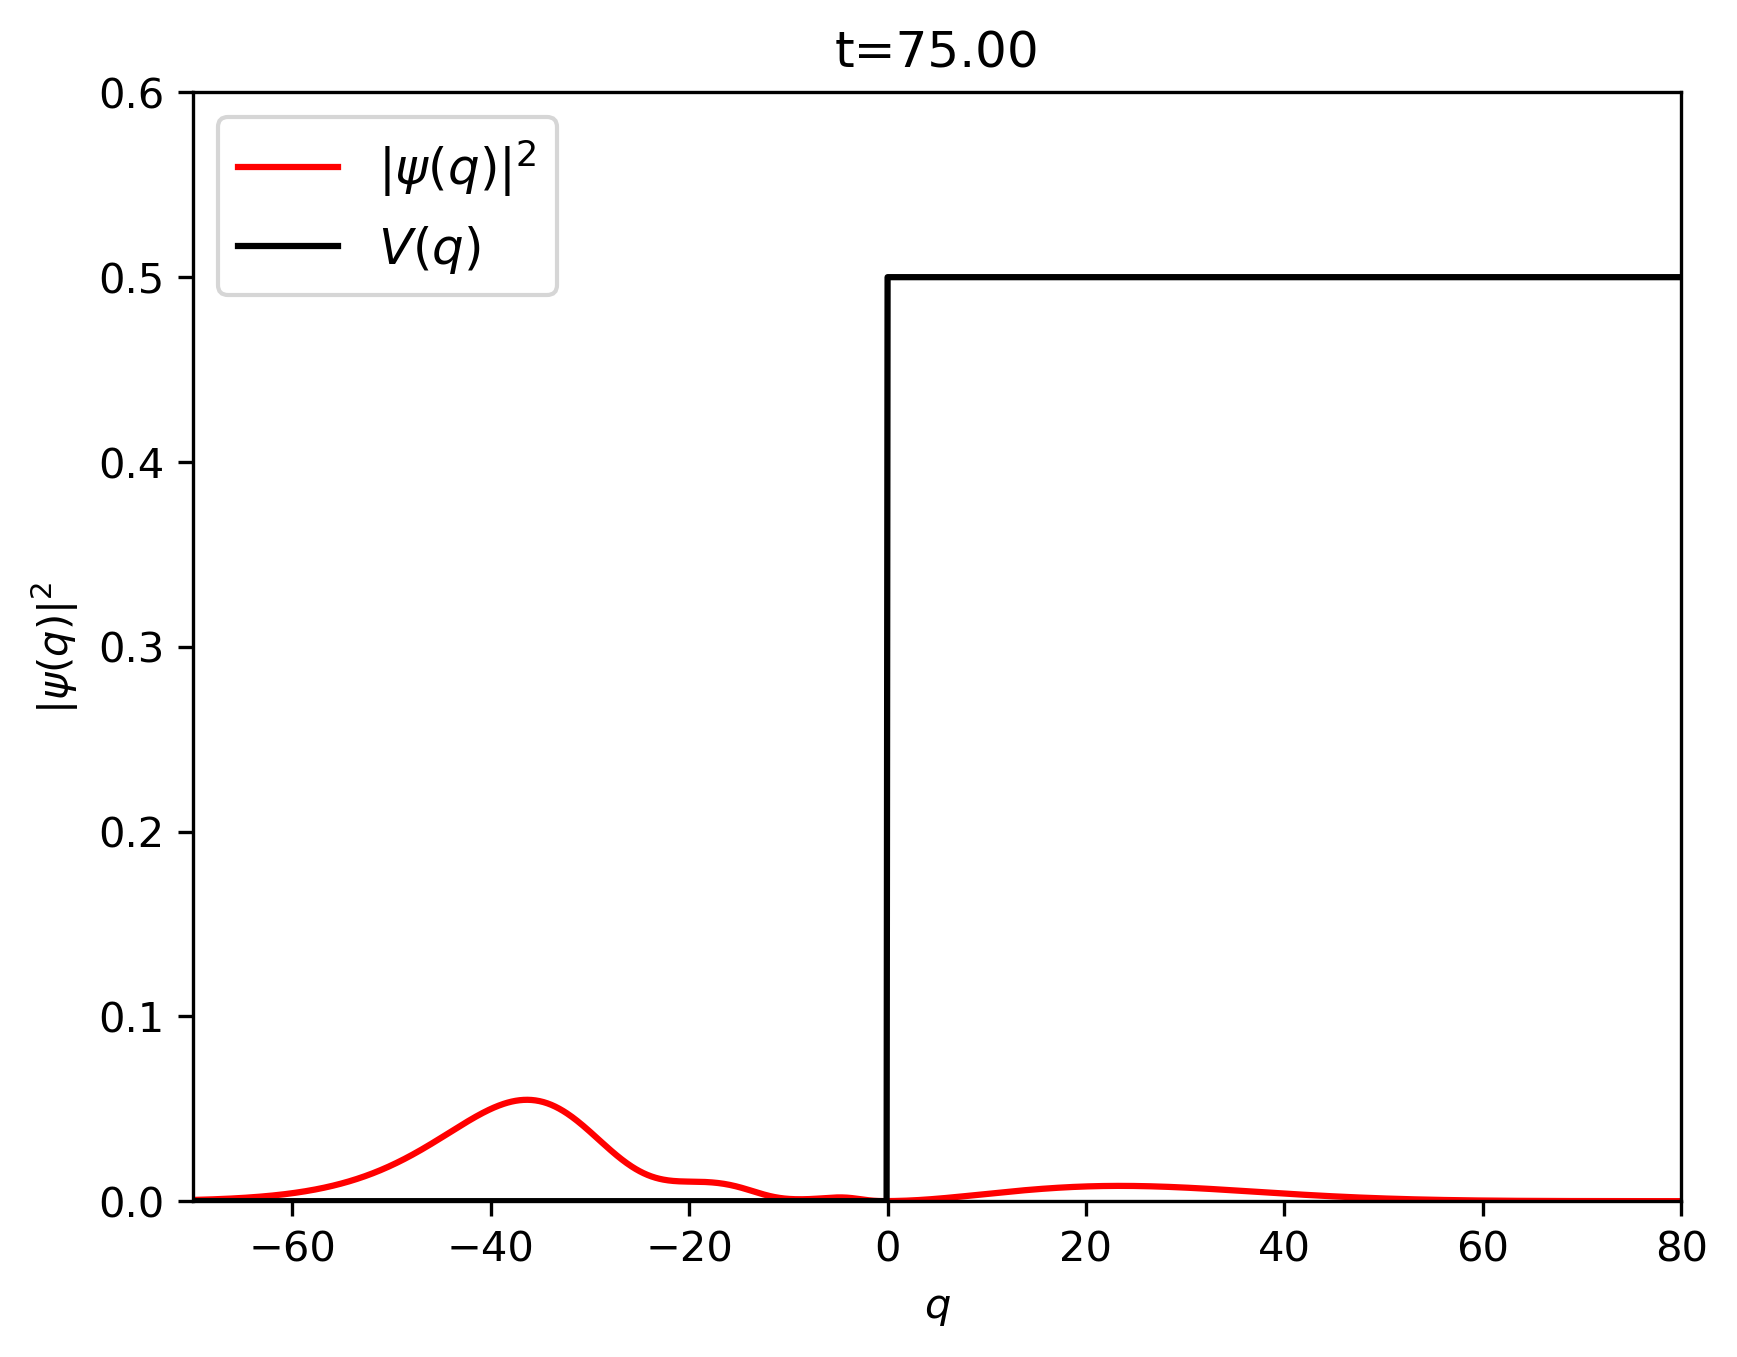

In [5]:
#creating the wave animation
xlim = (-70, 80)
ylim = (0,0.6)
save_wave(xlim=xlim, ylim=ylim, S=S, frames=frames, dt=dt, N_steps=N_steps, name='step_barrier_below', scaling = 1.5, save=True)

#### Run this cell to save the Wigner animation

In [43]:
#creating the wigner plot frames
#we can do either the desnity plot, or the surface plot, or both
xmin = -70
xmax = 80
ymin = -25
ymax = 25
psi_x0_input = psi_x0
for frame in range(frames):
    S = Schrodinger(x=x, psi_x0=psi_x0_input, V_x=V_x, hbar=hbar, m=m, k0=-28.0)
    wigner_plot(psi_x0_input, x, y, dx, dy, k0_ft_y, t_max, view = 230, limit = 10, xmin = xmin, xmax = xmax, ymin=ymin, ymax=ymax, save_fig = True, frame_num = frame, density = True, surface = False)
    S.time_step(dt, N_steps)
    psi_x0_input = S.psi_x
    
    
#animating the wigner plot frames
anim_wigner(density = True, surface = False)

##  Wave Energy $E=V_{0}$
Set $p_{0} = \sqrt{2mV_{0}}$

#### Run this Cell to save the wave evolution information in the object S

In [44]:
#specify x grid
N = 2 ** 11 #2048
dx = 0.1
x = dx * (np.arange(N) - 0.5 * N)
dy = dx
y = x

#potential barrier
def step_barrier(x, a, V0):
    potential = np.zeros(len(x))
    for i in range(len(x)):
        if x[i]<a:
            potential[i] = 0
        if x[i]>= a:
            potential[i] = V0
    return potential

V0 = 0.5
a = 0
V_x = step_barrier(x,a,V0)

#potential 'walls' at either end
V_x[x < -120] = 1E6 
V_x[x > 120] = 1E6

#variables
dt = 0.01
N_steps = 50
t_max = 200
frames = 151

#specifying constants
hbar = 1.0  
m = 1.0 #mass    
p0 = np.sqrt(2 * m  * V0) #intial momentum
k0 = p0 / hbar #intial wave number
v0 = p0 / m #initial velocity
d = 4.0 #initial width of wavepacket
x0 = -20 #initial centre of wavepacket 
k0_ft_y = -np.pi / dy

#wavefunction
def gauss_x(x, a, x0, k0):
    #wave with width a, centred at x0 with momentum k0
    return((a * np.sqrt(np.pi)) ** (-0.5) * np.exp(-0.5 * ((x - x0) * 1. / a) ** 2 + 1j * x * k0))

psi_x0 = gauss_x(x, d, x0, k0)

#creating the schrodinger object
S = Schrodinger(x=x, psi_x0=psi_x0, V_x=V_x, hbar=hbar, m=m, k0=-28)

#### Run this cell to save the wave animation

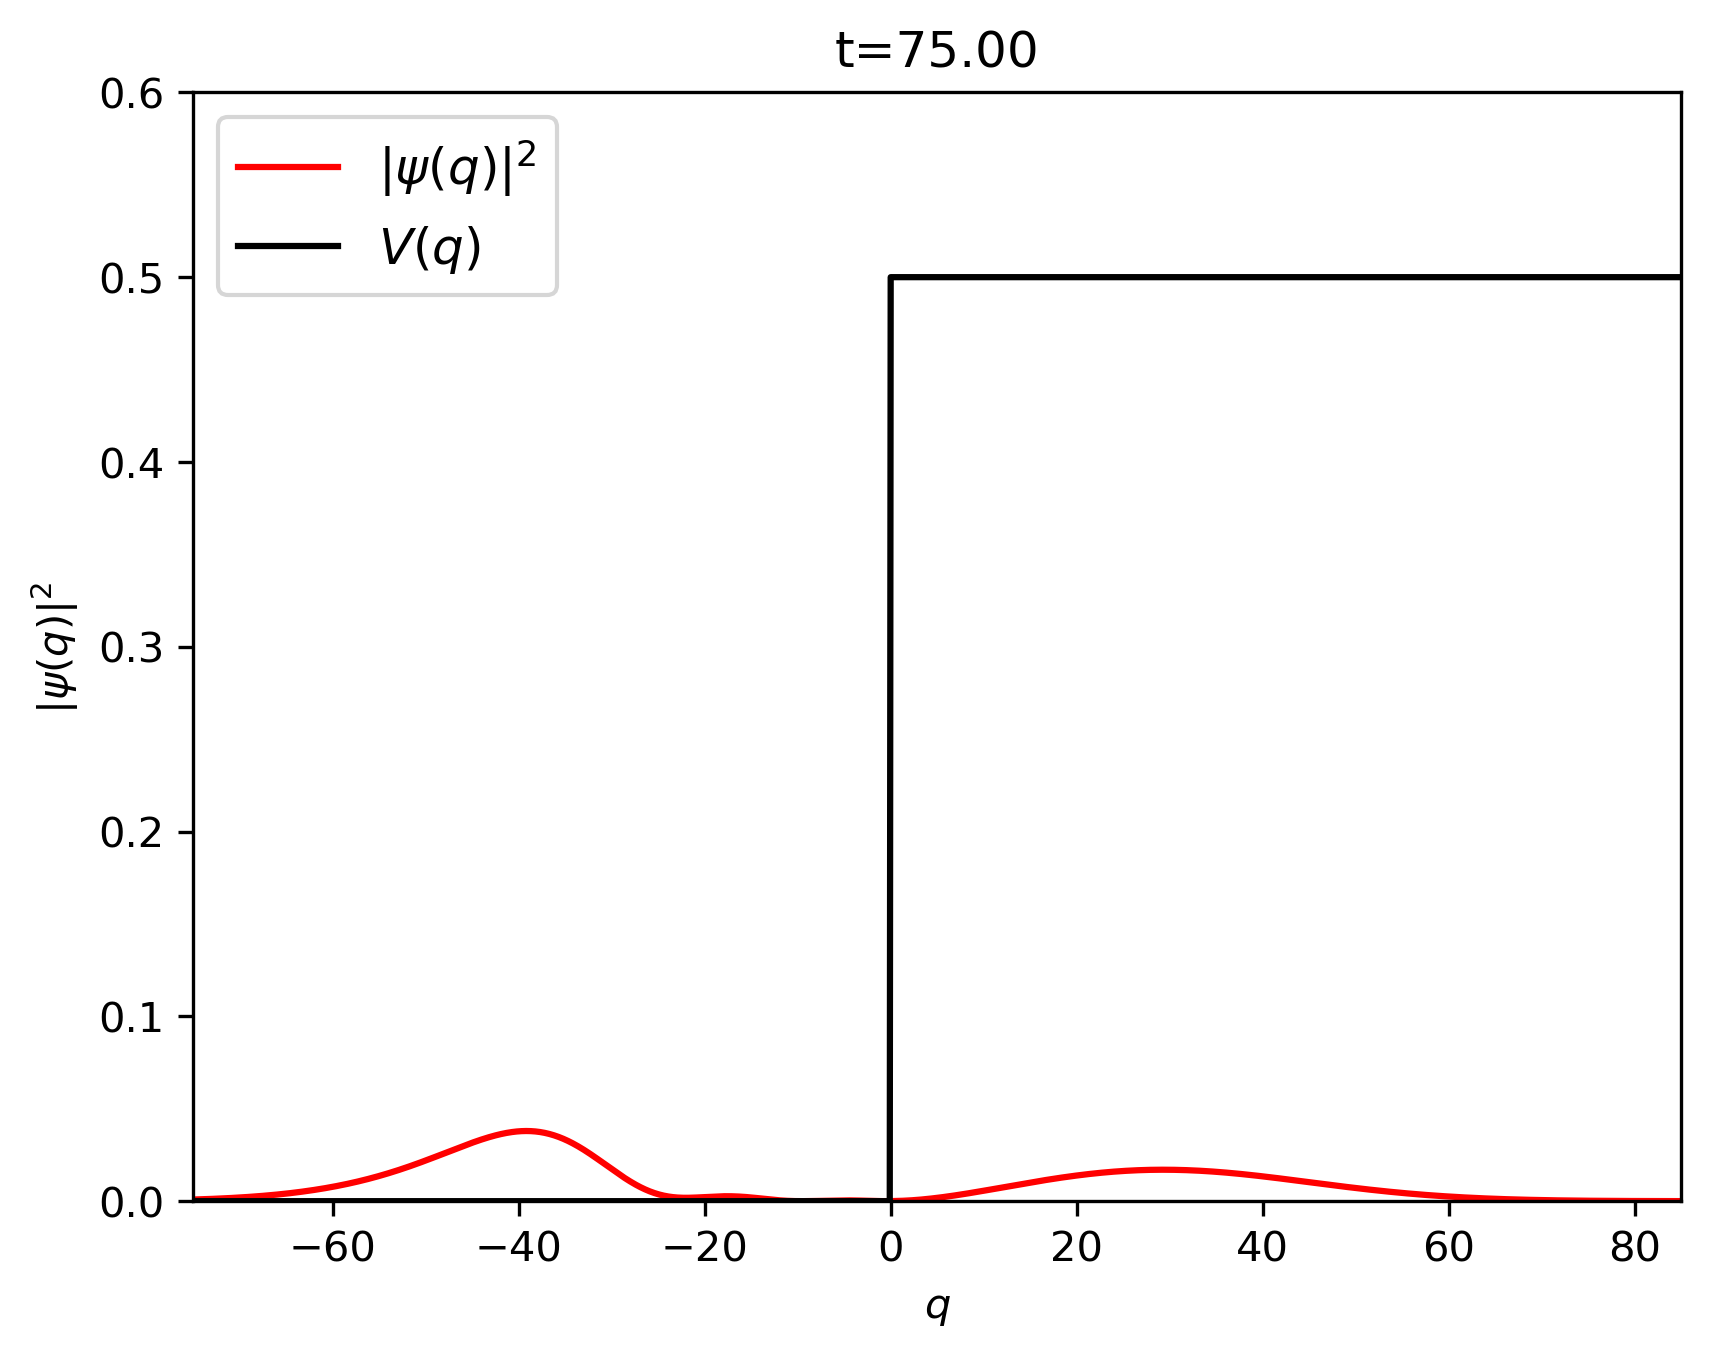

In [45]:
#creating the wave animation
xlim = (-75, 85)
ylim = (0,0.6)
save_wave(xlim=xlim, ylim=ylim, S=S, frames=frames, dt=dt, N_steps=N_steps, name='step_barrier_equal', scaling = 1.5, save=True)

#### Run this cell to save the Wigner animation

In [46]:
#creating the wigner plot frames
#we can do either the desnity plot, or the surface plot, or both
xmin = -75
xmax = 85
ymin = -25
ymax = 25
psi_x0_input = psi_x0
for frame in range(frames):
    S = Schrodinger(x=x, psi_x0=psi_x0_input, V_x=V_x, hbar=hbar, m=m, k0=-28.0)
    wigner_plot(psi_x0_input, x, y, dx, dy, k0_ft_y, t_max, view = 230, limit = 10, xmin = xmin, xmax = xmax, ymin=ymin, ymax=ymax, save_fig = True, frame_num = frame, density = True, surface = False)
    S.time_step(dt, N_steps)
    psi_x0_input = S.psi_x
    
    
#animating the wigner plot frames
anim_wigner(density = True, surface = False)

## Wave Energy $E>V_{0}$
Set $p_{0} = \sqrt{2m\frac{3}{2}V_{0}}$

#### Run this Cell to save the wave evolution information in the object S

In [49]:
#specify x grid
N = 2 ** 11 #2048
dx = 0.1
x = dx * (np.arange(N) - 0.5 * N)
dy = dx
y = x

#potential barrier
def step_barrier(x, a, V0):
    potential = np.zeros(len(x))
    for i in range(len(x)):
        if x[i]<a:
            potential[i] = 0
        if x[i]>= a:
            potential[i] = V0
    return potential

V0 = 0.5
a = 0
V_x = step_barrier(x,a,V0)

#potential 'walls' at either end
V_x[x < -120] = 1E6 
V_x[x > 120] = 1E6

#variables
dt = 0.01
N_steps = 50
t_max = 200
frames = 151

#specifying constants
hbar = 1.0  
m = 1.0 #mass    
p0 = np.sqrt(2 * m * 1.5 * V0) #intial momentum
k0 = p0 / hbar #intial wave number
v0 = p0 / m #initial velocity
d = 4.0 #initial width of wavepacket
x0 = -20 #initial centre of wavepacket 
k0_ft_y = -np.pi / dy

#wavefunction
def gauss_x(x, a, x0, k0):
    #wave with width a, centred at x0 with momentum k0
    return((a * np.sqrt(np.pi)) ** (-0.5) * np.exp(-0.5 * ((x - x0) * 1. / a) ** 2 + 1j * x * k0))

psi_x0 = gauss_x(x, d, x0, k0)

#creating the schrodinger object
S = Schrodinger(x=x, psi_x0=psi_x0, V_x=V_x, hbar=hbar, m=m, k0=-28)

#### Run this cell to save the wave animation

Frames folder found, overwritting


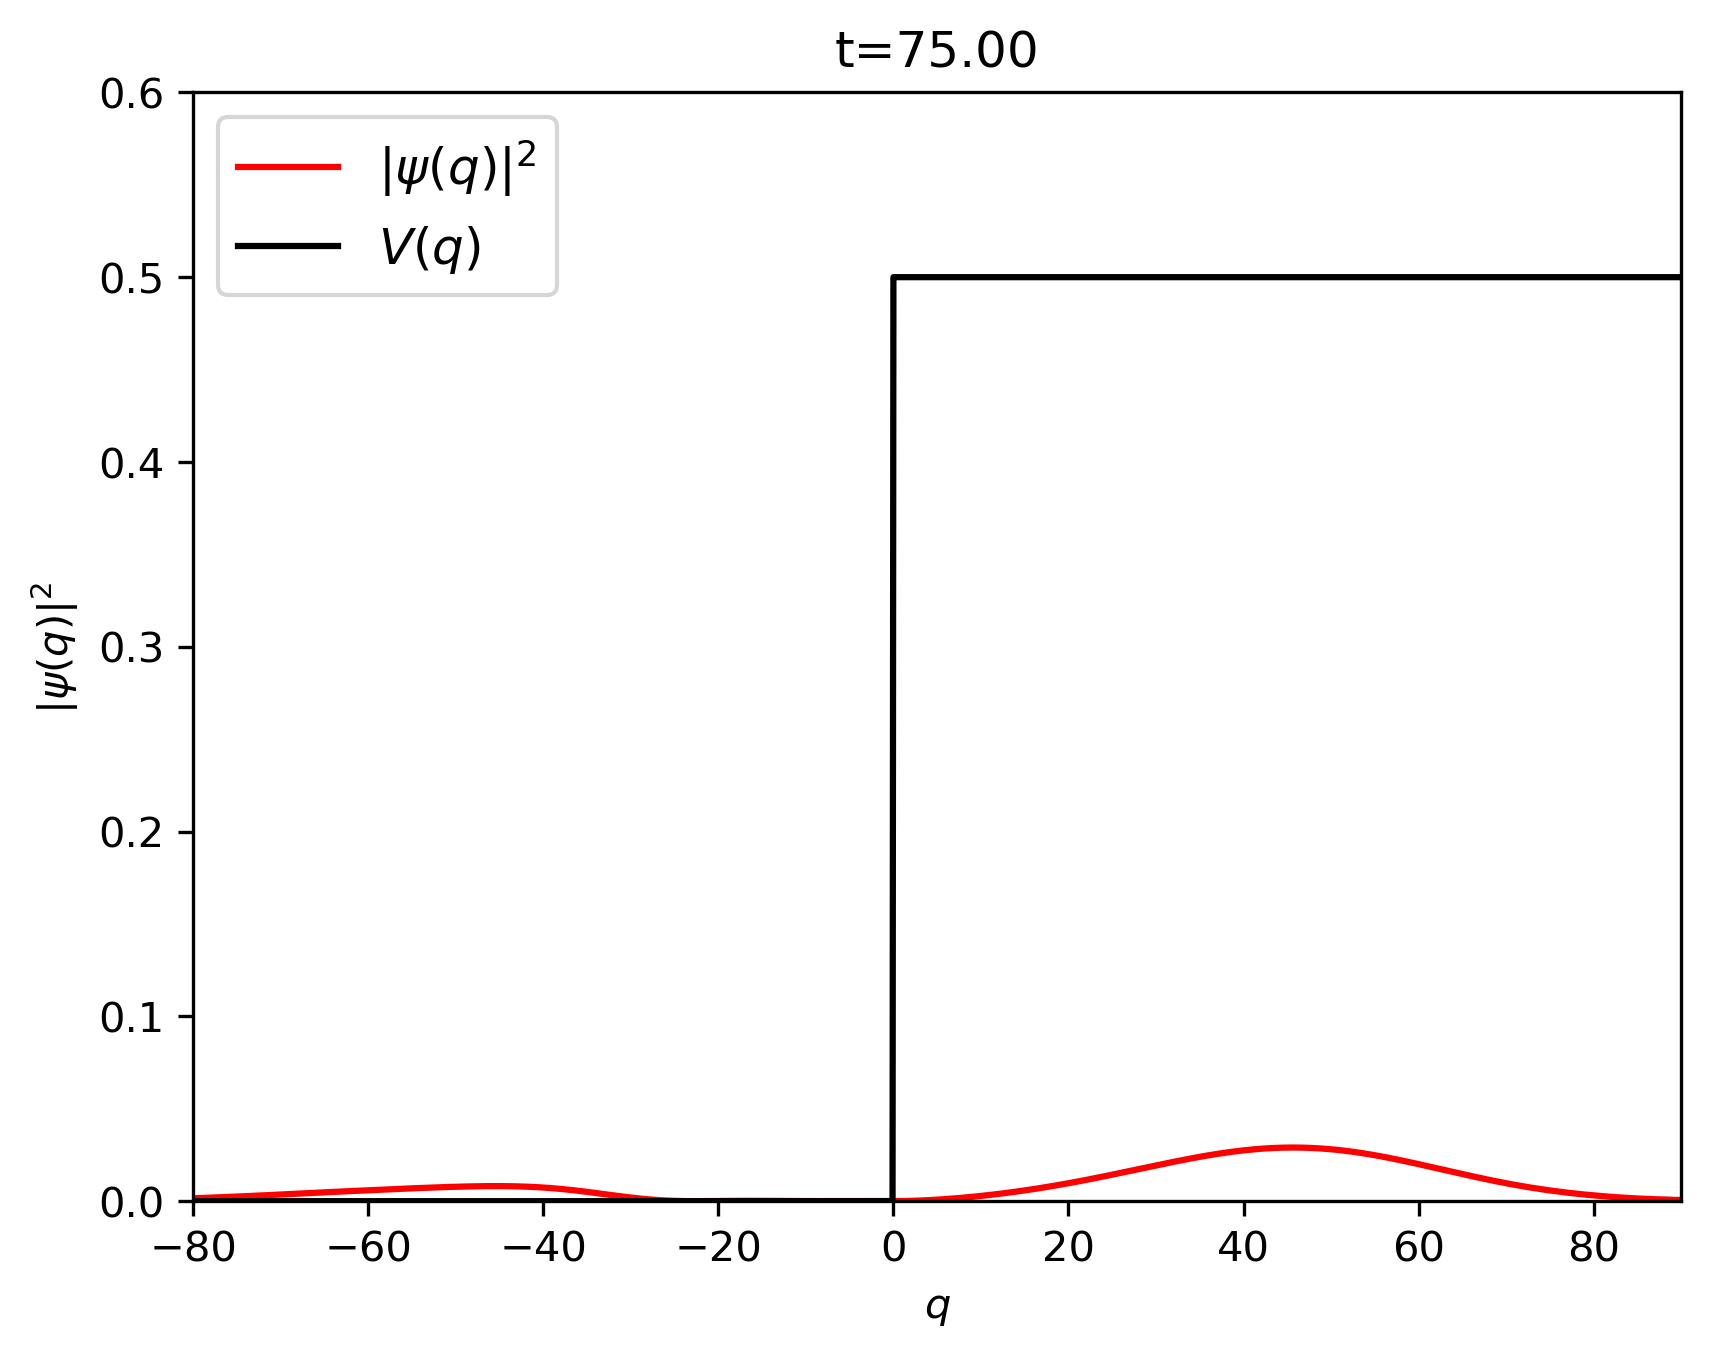

In [50]:
#creating the wave animation
xlim = (-80, 90)
ylim = (0,0.6)
save_wave(xlim=xlim, ylim=ylim, S=S, frames=frames, dt=dt, N_steps=N_steps, name='step_barrier_above', scaling = 1.5, save=True)

#### Run this cell to save the Wigner animation

In [51]:
#creating the wigner plot frames
#we can do either the desnity plot, or the surface plot, or both
xmin = -80
xmax = 90
ymin = -25
ymax = 25
psi_x0_input = psi_x0
for frame in range(frames):
    S = Schrodinger(x=x, psi_x0=psi_x0_input, V_x=V_x, hbar=hbar, m=m, k0=-28.0)
    wigner_plot(psi_x0_input, x, y, dx, dy, k0_ft_y, t_max, view = 230, limit = 10, xmin = xmin, xmax = xmax, ymin=ymin, ymax=ymax, save_fig = True, frame_num = frame, density = True, surface = False)
    S.time_step(dt, N_steps)
    psi_x0_input = S.psi_x
    
    
#animating the wigner plot frames
anim_wigner(density = True, surface = False)

# Single Rectangular Potential with Gaussian Wave
Consider the potential barrier \begin{equation} V(q) = \begin{cases} 0 & \text{if}\hspace{5mm} q<a \\
V_{0} & \text{if} \hspace{5mm} a<q<b \\
0 & \text{if} \hspace{5mm} q>b \end{cases}\end{equation}

## Wave Energy $E<V_{0}$
Set $p_{0} = \sqrt{2m\frac{3}{4}V_{0}}$

#### Run this Cell to save the wave evolution information in the object S

In [23]:
#specify x grid
N = 2 ** 11 #2048
dx = 0.1
x = dx * (np.arange(N) - 0.5 * N)
dy = dx
y = x

#potential barrier
def rectangular_barrier(x, a, b, V0):
    potential = np.zeros(len(x))
    for i in range(len(x)):
        if x[i]<a:
            potential[i] = 0
        if x[i]>= a and x[i]<= b:
            potential[i] = V0
        if x[i]>b:
            potential[i] = 0
    return potential

V0 = 0.5
a = -2
b = 2
V_x = rectangular_barrier(x,a,b,V0)

#potential 'walls' at either end
V_x[x < -120] = 1E6 
V_x[x > 120] = 1E6

#variables
dt = 0.01
N_steps = 50
t_max = 200
frames = 151

#specifying constants
hbar = 1.0  
m = 1.0 #mass    
p0 = np.sqrt(2 * m  * 0.75 * V0) #intial momentum
k0 = p0 / hbar #intial wave number
v0 = p0 / m #initial velocity
d = 4.0 #initial width of wavepacket
x0 = -20 #initial centre of wavepacket 
k0_ft_y = -np.pi / dy

#wavefunction
def gauss_x(x, a, x0, k0):
    #wave with width a, centred at x0 with momentum k0
    return((a * np.sqrt(np.pi)) ** (-0.5) * np.exp(-0.5 * ((x - x0) * 1. / a) ** 2 + 1j * x * k0))

psi_x0 = gauss_x(x, d, x0, k0)


#creating the schrodinger object
S = Schrodinger(x=x, psi_x0=psi_x0, V_x=V_x, hbar=hbar, m=m, k0=-28)

#### Run this cell to save the wave animation

Frames folder found, overwritting


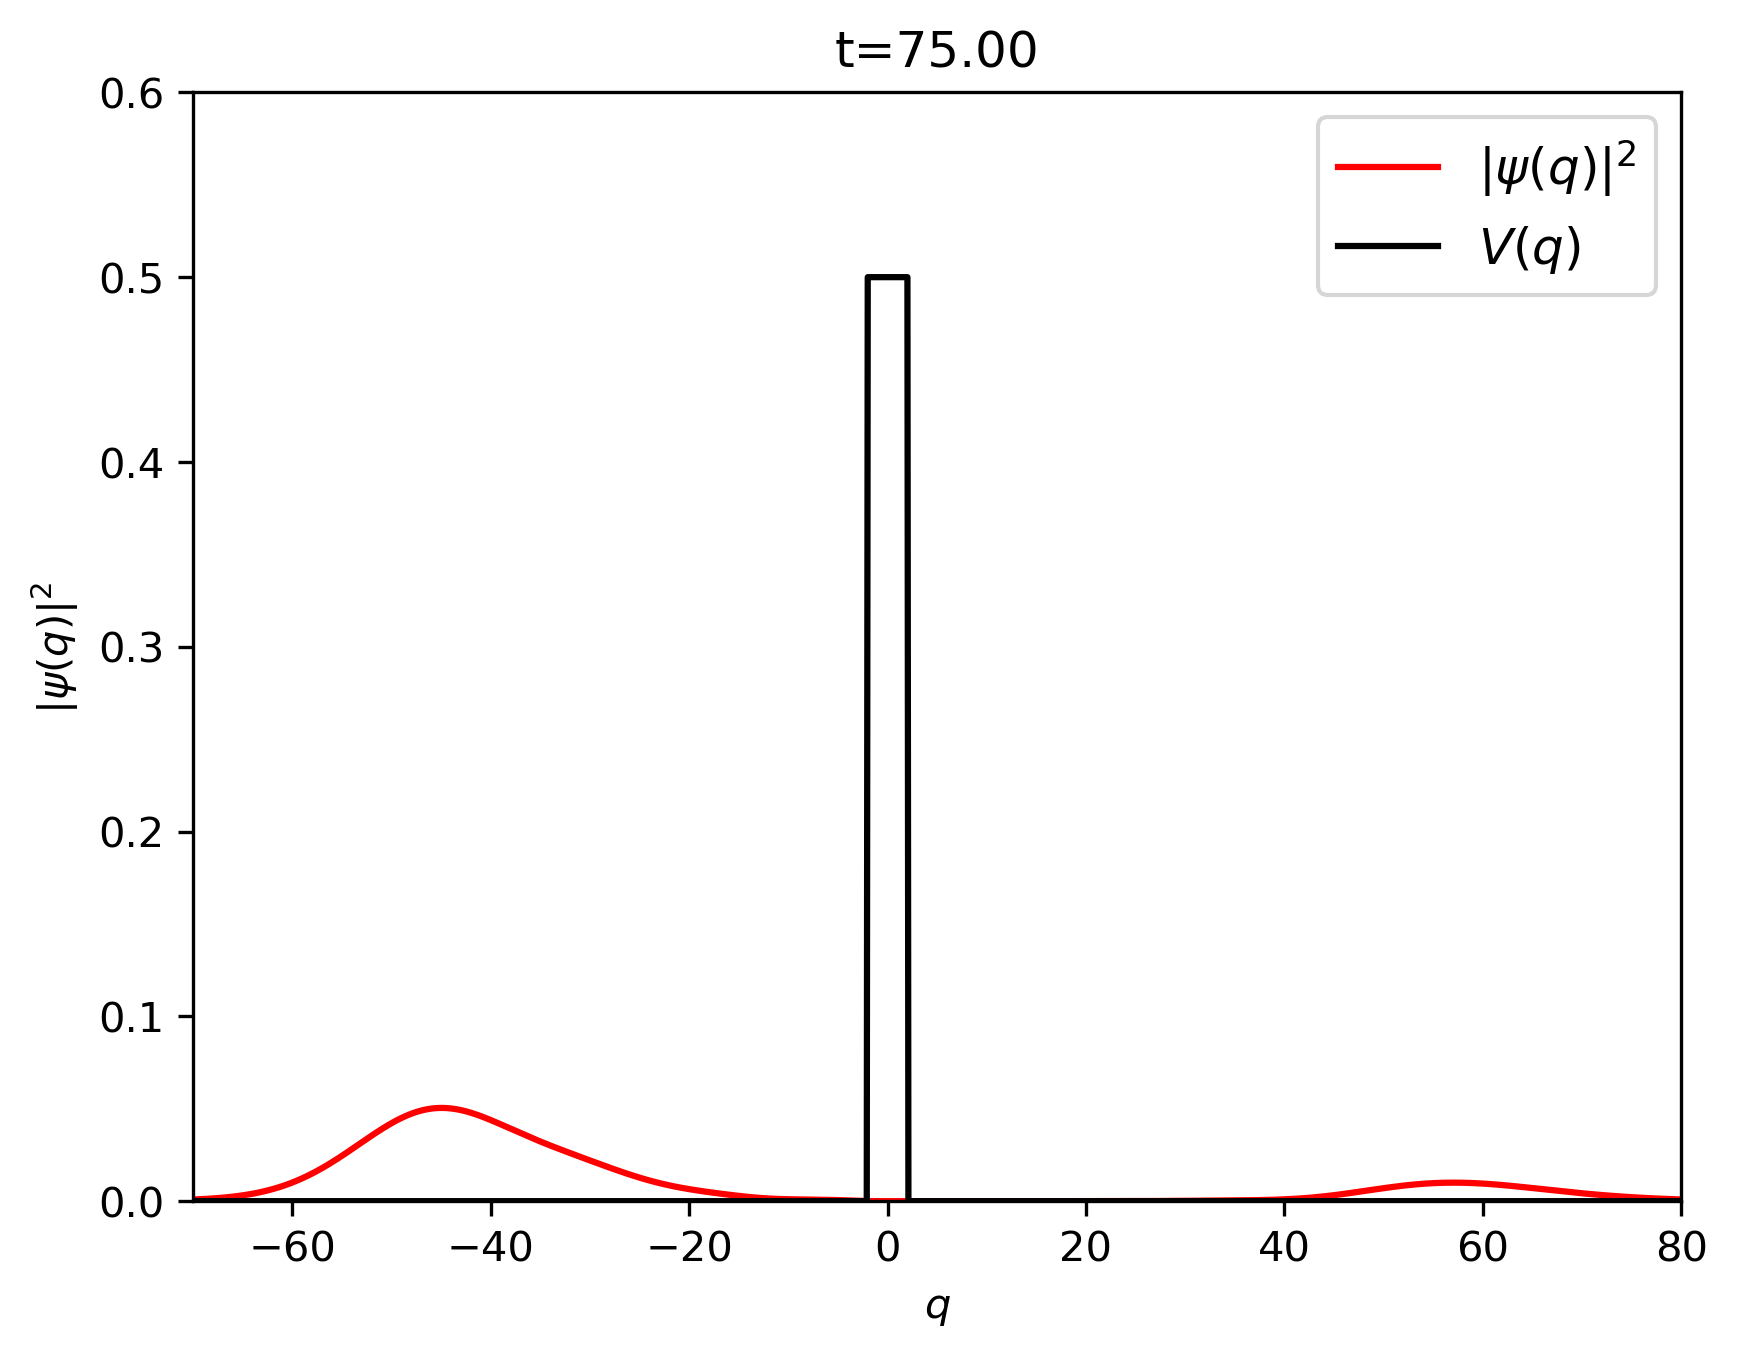

In [24]:
#creating the wave animation
#do save = 'True' to save or save='False' to play it in the notebook
xlim = (-70, 80)
ylim = (0,0.6)
save_wave(xlim=xlim, ylim=ylim, S=S, frames=frames, dt=dt, N_steps=N_steps, name='rectangle_barrier_below', scaling = 1.5, save=True)

#### Run this cell to save the Wigner animation

In [25]:
#creating the wigner plot frames
xmin = -70
xmax = 80
ymin = -25
ymax = 25
psi_x0_input = psi_x0
for frame in range(frames):
    S = Schrodinger(x=x, psi_x0=psi_x0_input, V_x=V_x, hbar=hbar, m=m, k0=-28.0)
    wigner_plot(psi_x0_input, x, y, dx, dy, k0_ft_y, t_max, view = 230, limit = 10, xmin = xmin, xmax = xmax, ymin=ymin, ymax=ymax, save_fig = True, frame_num = frame, density = True, surface = False)
    S.time_step(dt, N_steps)
    psi_x0_input = S.psi_x
    
    
#animating the wigner plot frames
anim_wigner(density = True, surface = False)


### Wave Energy $E=V_{0}$
Set $p_{0} = \sqrt{2mV_{0}}$

#### Run this Cell to save the wave evolution information in the object S

In [30]:
#specify x grid
N = 2 ** 11 #2048
dx = 0.1
x = dx * (np.arange(N) - 0.5 * N)
dy = dx
y = x

#potential barrier
def rectangular_barrier(x, a, b, V0):
    potential = np.zeros(len(x))
    for i in range(len(x)):
        if x[i]<a:
            potential[i] = 0
        if x[i]>= a and x[i]<= b:
            potential[i] = V0
        if x[i]>b:
            potential[i] = 0
    return potential

V0 = 0.5
a = -2
b = 2
V_x = rectangular_barrier(x,a,b,V0)

#potential 'walls' at either end
V_x[x < -120] = 1E6 
V_x[x > 120] = 1E6

#variables
dt = 0.01
N_steps = 50
t_max = 200
frames = 151

#specifying constants
hbar = 1.0  
m = 1.0 #mass    
p0 = np.sqrt(2 * m  * V0) #intial momentum
k0 = p0 / hbar #intial wave number
v0 = p0 / m #initial velocity
d = 4.0 #initial width of wavepacket
x0 = -20 #initial centre of wavepacket 
k0_ft_y = -np.pi / dy

#wavefunction
def gauss_x(x, a, x0, k0):
    #wave with width a, centred at x0 with momentum k0
    return((a * np.sqrt(np.pi)) ** (-0.5) * np.exp(-0.5 * ((x - x0) * 1. / a) ** 2 + 1j * x * k0))

psi_x0 = gauss_x(x, d, x0, k0)


#creating the schrodinger object
S = Schrodinger(x=x, psi_x0=psi_x0, V_x=V_x, hbar=hbar, m=m, k0=-28)

#### Run this cell to save the wave animation

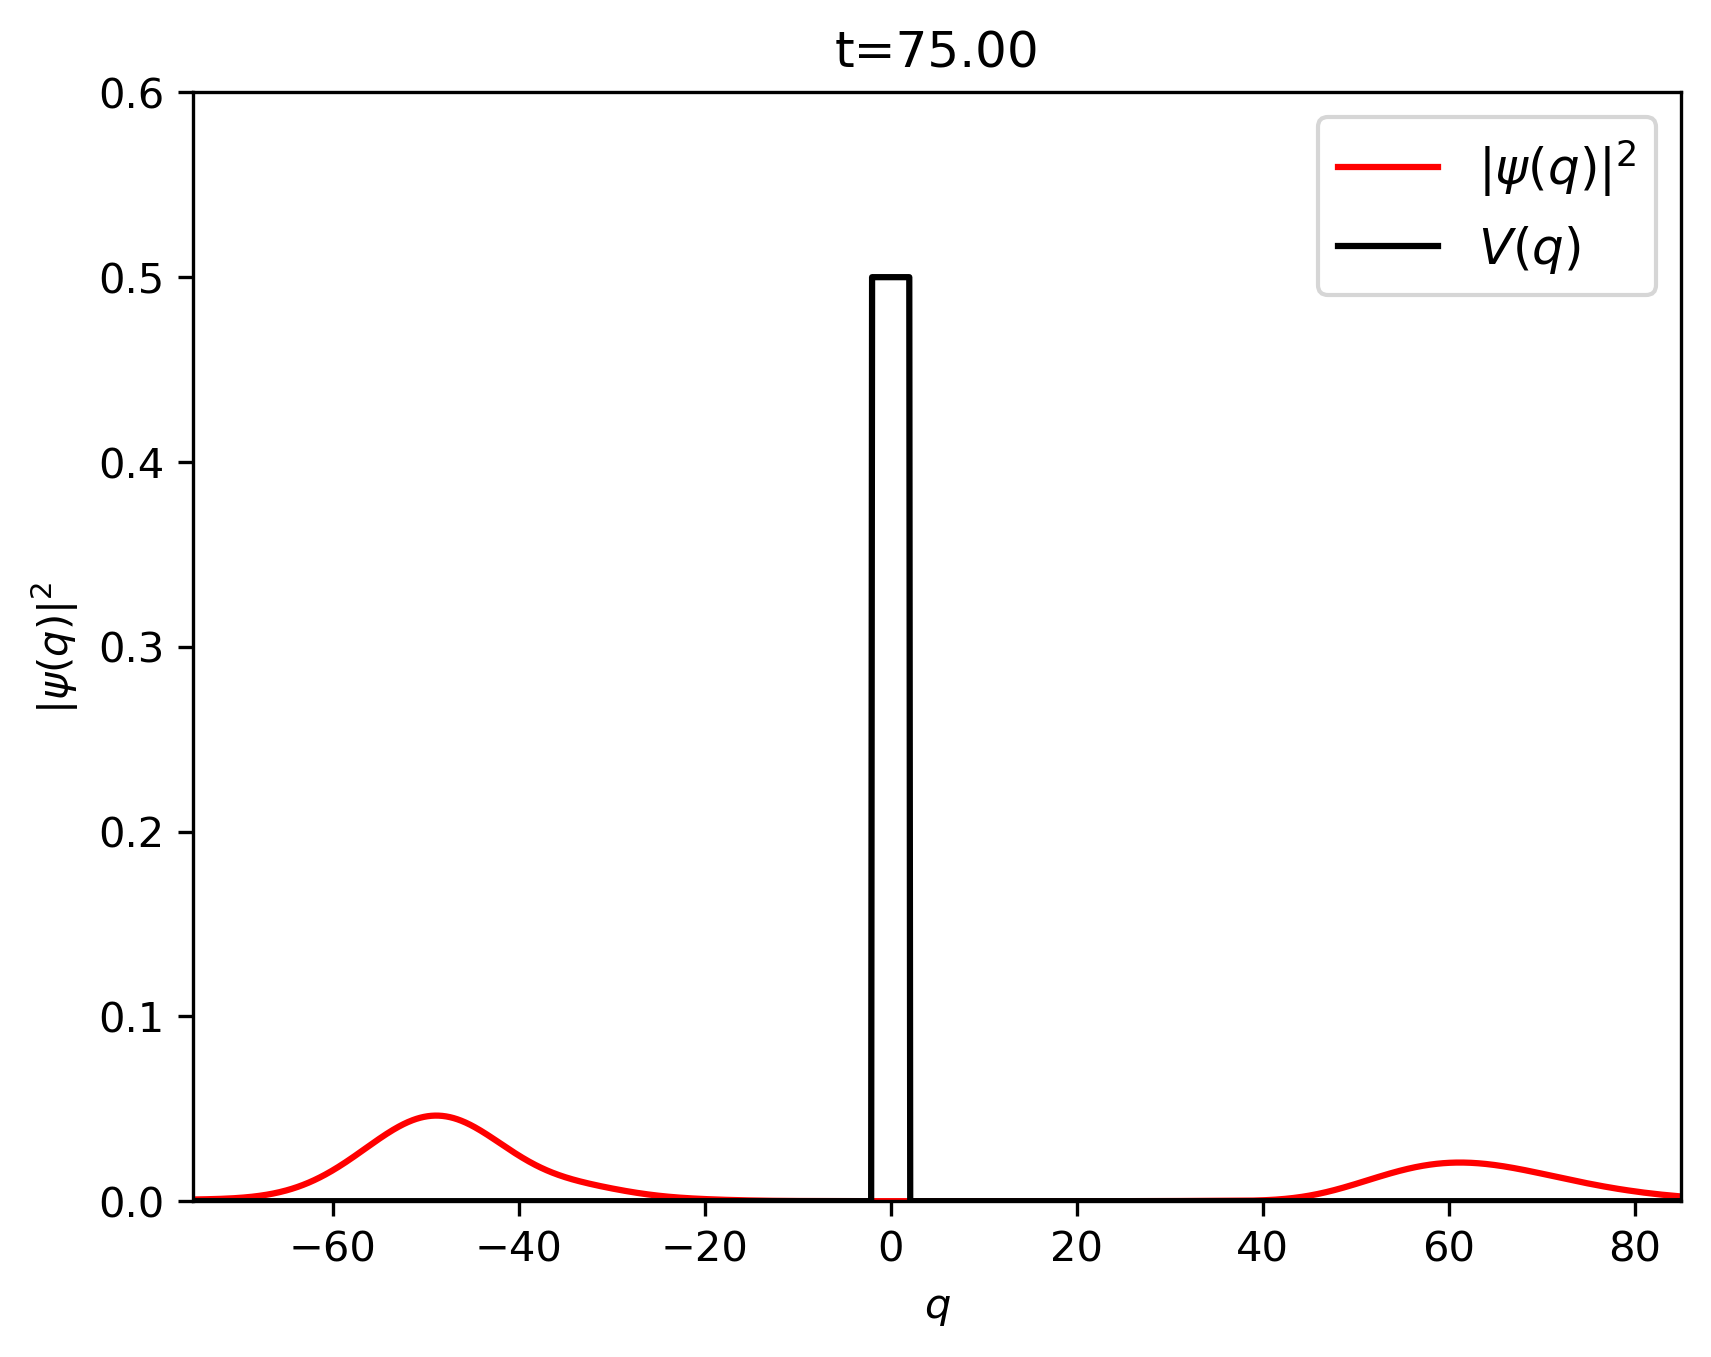

In [27]:
#creating the wave animation
#do save = 'True' to save or save='False' to play it in the notebook
xlim = (-75, 85)
ylim = (0,0.6)
save_wave(xlim=xlim, ylim=ylim, S=S, frames=frames, dt=dt, N_steps=N_steps, name='rectangle_barrier_equal', scaling = 1.5, save=True)

#### Run this cell to save the Wigner animation

In [31]:
#creating the wigner plot frames
#we can do either the desnity plot, or the surface plot, or both
xmin = -75
xmax = 85
ymin = -25
ymax = 25
psi_x0_input = psi_x0
for frame in range(frames):
    S = Schrodinger(x=x, psi_x0=psi_x0_input, V_x=V_x, hbar=hbar, m=m, k0=-28.0)
    wigner_plot(psi_x0_input, x, y, dx, dy, k0_ft_y, t_max, view = 230, limit = 10, xmin = xmin, xmax = xmax, ymin=ymin, ymax=ymax, save_fig = True, frame_num = frame, density = True, surface = False)
    S.time_step(dt, N_steps)
    psi_x0_input = S.psi_x
    
    
#animating the wigner plot frames
anim_wigner(density = True, surface = False)

### Wave Energy $E>V_{0}$
Set $p_{0} = \sqrt{2m\frac{3}{2}V_{0}}$

#### Run this Cell to save the wave evolution information in the object S

In [16]:
#specify x grid
N = 2 ** 11 #2048
dx = 0.1
# x = dx * (np.arange(N) - 0.5 * N)
x = np.arange(-120,120,0.1)
dy = dx
y = x

#potential barrier
def rectangular_barrier(x, a, b, V0):
    potential = np.zeros(len(x))
    for i in range(len(x)):
        if x[i]<a:
            potential[i] = 0
        if x[i]>= a and x[i]<= b:
            potential[i] = V0
        if x[i]>b:
            potential[i] = 0
    return potential

V0 = 0.5
a = -2
b = 2
V_x = rectangular_barrier(x,a,b,V0)

#potential 'walls' at either end
V_x[x < -119] = 1E6 
V_x[x > 119] = 1E6

#variables
dt = 0.01
N_steps = 50
t_max = 200
frames = 151

#specifying constants
hbar = 1.0  
m = 1.0 #mass    
p0 = np.sqrt(2 * m  * 1.5 * V0) #intial momentum
k0 = p0 / hbar #intial wave number
v0 = p0 / m #initial velocity
d = 4.0 #initial width of wavepacket
x0 = -20 #initial centre of wavepacket 
k0_ft_y = -np.pi / dy

#wavefunction
def gauss_x(x, a, x0, k0):
    #wave with width a, centred at x0 with momentum k0
    return((a * np.sqrt(np.pi)) ** (-0.5) * np.exp(-0.5 * ((x - x0) * 1. / a) ** 2 + 1j * x * k0))

psi_x0 = gauss_x(x, d, x0, k0)


#creating the schrodinger object
S = Schrodinger(x=x, psi_x0=psi_x0, V_x=V_x, hbar=hbar, m=m, k0=-28)

#### Run this cell to save the wave animation

Frames folder found, overwritting


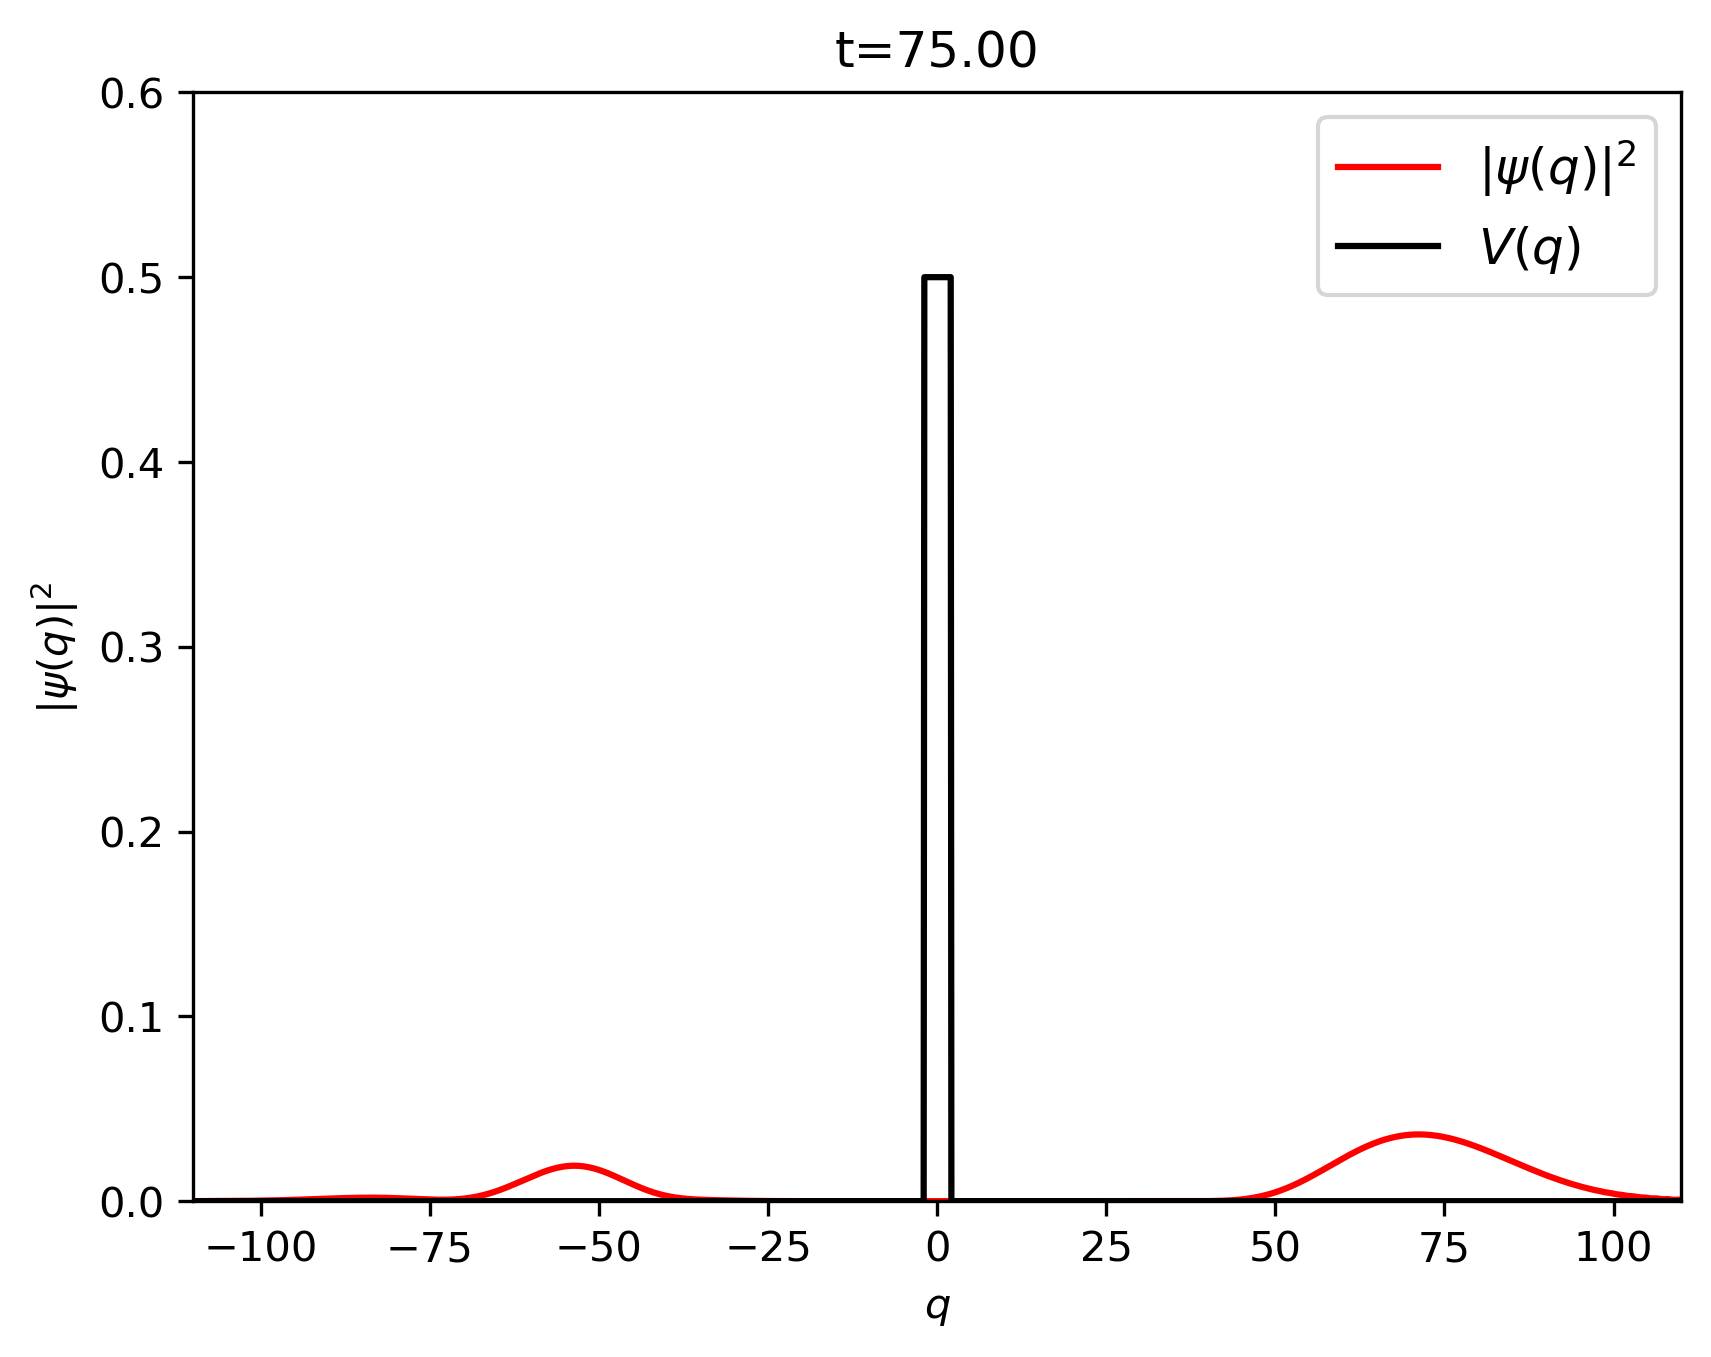

In [11]:
#creating the wave animation
#do save = 'True' to save or save='False' to play it in the notebook
xlim = (-110, 110)
ylim = (0,0.6)

save_wave(xlim=xlim, ylim=ylim, S=S, frames=frames, dt=dt, N_steps=N_steps, name='recatangle_barrier_above', scaling = 1.5, save=True)

#### Run this cell to save the Wigner animation

In [17]:
#creating the wigner plot frames
#we can do either the desnity plot, or the surface plot, or both
xmin = -110
xmax = 110
ymin = -25
ymax = 25
psi_x0_input = psi_x0
for frame in range(frames):
    S = Schrodinger(x=x, psi_x0=psi_x0_input, V_x=V_x, hbar=hbar, m=m, k0=-28.0)
    wigner_plot(psi_x0_input, x, y, dx, dy, k0_ft_y, t_max, view = 230, limit = 10, xmin = xmin, xmax = xmax, ymin=ymin, ymax=ymax, save_fig = True, frame_num = frame, density = True, surface = False)
    S.time_step(dt, N_steps)
    psi_x0_input = S.psi_x
    
    
#animating the wigner plot frames
anim_wigner(density = True, surface = False)

## Equal Double Gaussian Barrier

### $E<V_{0}$

#### Run this Cell to save the wave evolution information in the object S

In [8]:
#specify x grid
N = 2 ** 11 #2048
dx = 0.1
x = np.arange(-200,200,0.1)
dy = dx
y = x

#potential barrier
def gauss_barrier(x, a, x0):
    x = np.asarray(x)
    return (a * np.sqrt(np.pi))** (-0.5) * np.exp(-0.5 * (((x-20) - x0)*1./a) ** 2) + (a * np.sqrt(np.pi))** (-0.5) * np.exp(-0.5 * (((x+20) - x0)*1./a) ** 2)

V_x = gauss_barrier(x, 3, 0)
V0 = np.max(V_x)

#potential 'walls' at either end
V_x[x < -198] = 1E6 
V_x[x > 198] = 1E6

#variables
dt = 0.01
N_steps = 50
t_max = 200
frames = 251

#specifying constants
hbar = 1.0  
m = 1.0 #mass    
p0 = np.sqrt(2 * m  * 0.75 * V0) #intial momentum
k0 = p0 / hbar #intial wave number
v0 = p0 / m #initial velocity
d = 4.0 #initial width of wavepacket
x0 = -40 #initial centre of wavepacket 
k0_ft_y = -np.pi / dy

#wavefunction
def gauss_x(x, a, x0, k0):
    #wave with width a, centred at x0 with momentum k0
    return((a * np.sqrt(np.pi)) ** (-0.5) * np.exp(-0.5 * ((x - x0) * 1. / a) ** 2 + 1j * x * k0))

psi_x0 = gauss_x(x, d, x0, k0)


#creating the schrodinger object
S = Schrodinger(x=x, psi_x0=psi_x0, V_x=V_x, hbar=hbar, m=m, k0=-28)

#### Run this cell to play / save the wave animation

Frames folder found, overwritting


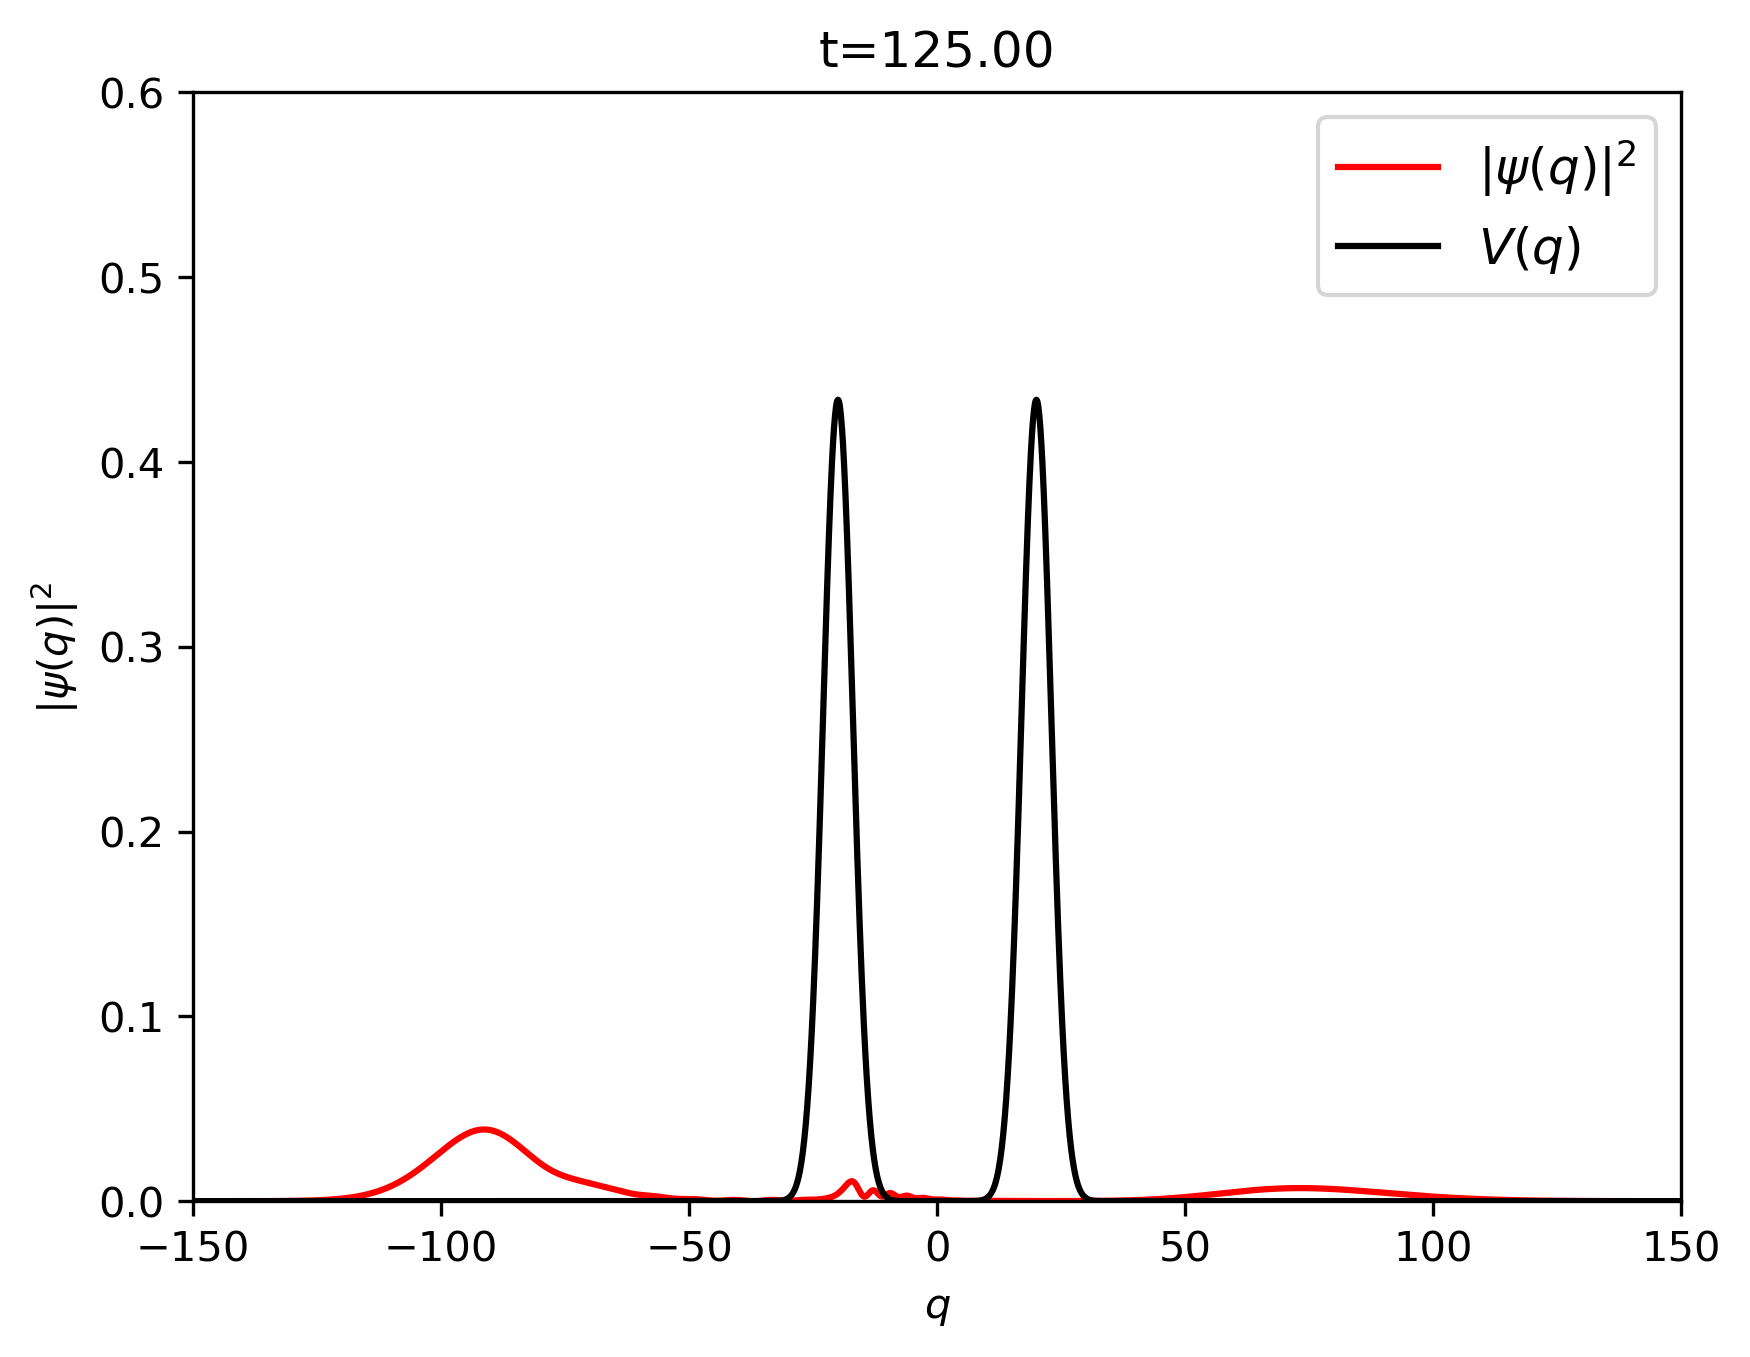

In [19]:
#creating the wave animation
#do save = 'True' to save or save='False' to play it in the notebook
xlim = (-150, 150)
ylim = (0,0.6)
save_wave(xlim=xlim, ylim=ylim, S=S, frames=frames, dt=dt, N_steps=N_steps, name='double_barrier_below', scaling = 1.5, save=True)

#### Run this cell to save the Wigner animation

In [9]:
#creating the wigner plot frames
ymin = -50
ymax = 50

import time
xmin = -150
xmax = 150
psi_x0_input = psi_x0
for frame in range(frames):
    S = Schrodinger(x=x, psi_x0=psi_x0_input, V_x=V_x, hbar=hbar, m=m, k0=-28.0)
    wigner_plot(psi_x0_input, x, y, dx, dy, k0_ft_y, t_max, view = 230, limit = 10, xmin = xmin, xmax = xmax, ymin=ymin, ymax=ymax, save_fig = True, frame_num = frame, density = True, surface = False)
    S.time_step(dt, N_steps)
    psi_x0_input = S.psi_x
    del S
    time.sleep(1)
    
    
    
#animating the wigner plot frames
anim_wigner(density = True, surface = False)


Frames folder found, overwritting


### $E=V_{0}$

#### Run this Cell to save the wave evolution information in the object S

In [2]:
#specify x grid
N = 2 ** 11 #2048
dx = 0.1
x = np.arange(-200,200,0.1)
dy = dx
y = x

#potential barrier
def gauss_barrier(x, a, x0):
    x = np.asarray(x)
    return (a * np.sqrt(np.pi))** (-0.5) * np.exp(-0.5 * (((x-20) - x0)*1./a) ** 2) + (a * np.sqrt(np.pi))** (-0.5) * np.exp(-0.5 * (((x+20) - x0)*1./a) ** 2)

V_x = gauss_barrier(x, 3, 0)
V0 = np.max(V_x)

#potential 'walls' at either end
V_x[x < -198] = 1E6 
V_x[x > 198] = 1E6

#variables
dt = 0.01
N_steps = 50
t_max = 200
frames = 251

#specifying constants
hbar = 1.0  
m = 1.0 #mass    
p0 = np.sqrt(2 * m  * V0) #intial momentum
k0 = p0 / hbar #intial wave number
v0 = p0 / m #initial velocity
d = 4.0 #initial width of wavepacket
x0 = -40 #initial centre of wavepacket 
k0_ft_y = -np.pi / dy

#wavefunction
def gauss_x(x, a, x0, k0):
    #wave with width a, centred at x0 with momentum k0
    return((a * np.sqrt(np.pi)) ** (-0.5) * np.exp(-0.5 * ((x - x0) * 1. / a) ** 2 + 1j * x * k0))

psi_x0 = gauss_x(x, d, x0, k0)


#creating the schrodinger object
S = Schrodinger(x=x, psi_x0=psi_x0, V_x=V_x, hbar=hbar, m=m, k0=-28)

#### Run this cell to play / save the wave animation

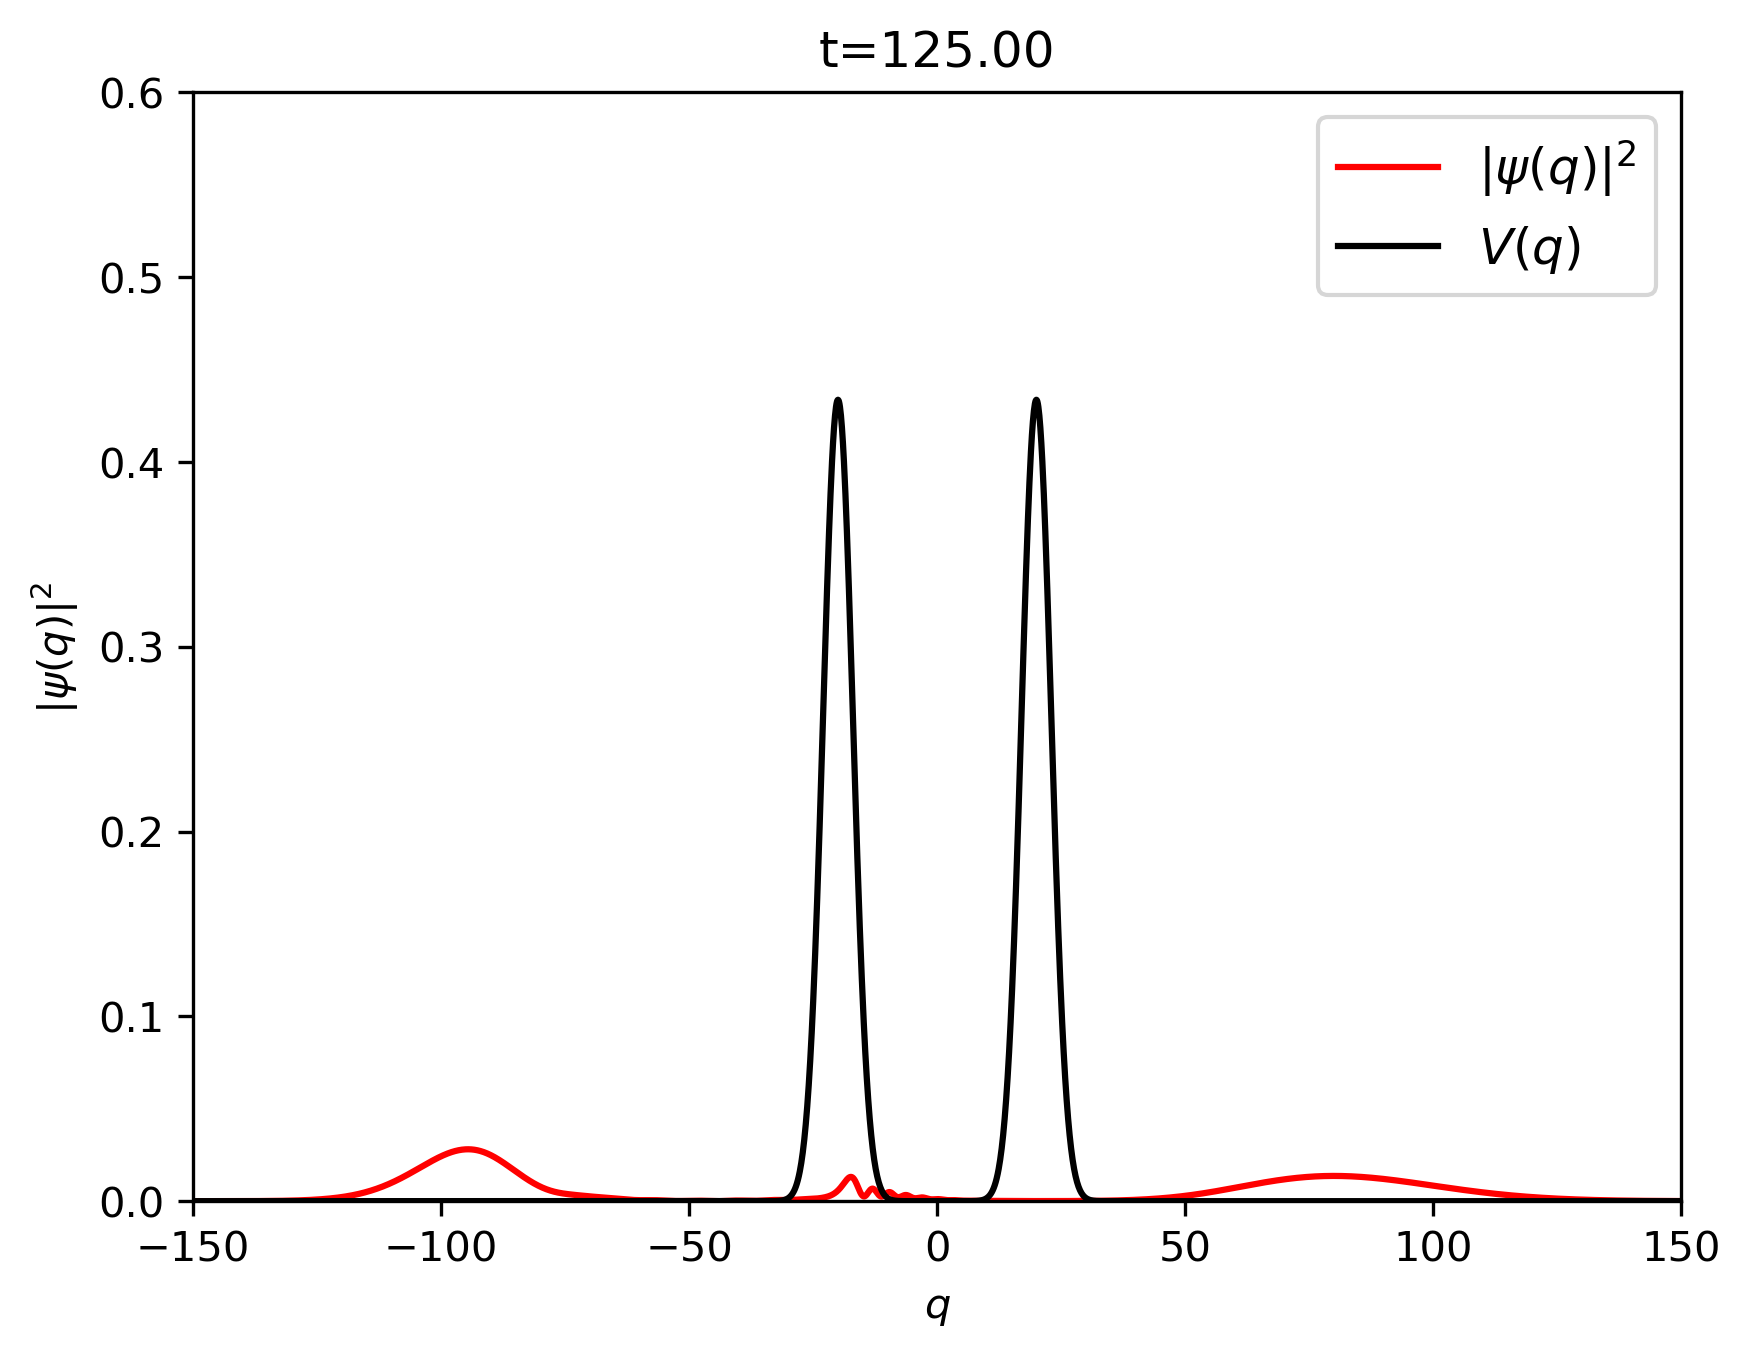

In [3]:
#creating the wave animation
#do save = 'True' to save or save='False' to play it in the notebook
xlim = (-150, 150)
ylim = (0,0.6)
save_wave(xlim=xlim, ylim=ylim, S=S, frames=frames, dt=dt, N_steps=N_steps, name='double_barrier_equal', scaling = 1.5, save=True)

#### Run this cell to save the Wigner animation

In [19]:
#creating the wigner plot frames
xmin = -150
xmax = 150
ymin = -50
ymax = 50
psi_x0_input = psi_x0
for frame in range(frames):
    S = Schrodinger(x=x, psi_x0=psi_x0_input, V_x=V_x, hbar=hbar, m=m, k0=-28.0)
    wigner_plot(psi_x0_input, x, y, dx, dy, k0_ft_y, t_max, view = 230, limit = 10, xmin = xmin, xmax = xmax, ymin=ymin, ymax=ymax, save_fig = True, frame_num = frame, density = True, surface = False)
    S.time_step(dt, N_steps)
    psi_x0_input = S.psi_x
    
    
#animating the wigner plot frames
anim_wigner(density = True, surface = False)


### $E>V_{0}$

#### Run this Cell to save the wave evolution information in the object S

In [10]:
#specify x grid
N = 2 ** 11 #2048
dx = 0.1
x = np.arange(-200,200,0.1)
dy = dx
y = x

#potential barrier
def gauss_barrier(x, a, x0):
    x = np.asarray(x)
    return (a * np.sqrt(np.pi))** (-0.5) * np.exp(-0.5 * (((x-20) - x0)*1./a) ** 2) + (a * np.sqrt(np.pi))** (-0.5) * np.exp(-0.5 * (((x+20) - x0)*1./a) ** 2)

V_x = gauss_barrier(x, 3, 0)
V0 = np.max(V_x)

#potential 'walls' at either end
V_x[x < -198] = 1E6 
V_x[x > 198] = 1E6

#variables
dt = 0.01
N_steps = 50
t_max = 200
frames = 251

#specifying constants
hbar = 1.0  
m = 1.0 #mass    
p0 = np.sqrt(2 * m * 1.5 * V0) #intial momentum
k0 = p0 / hbar #intial wave number
v0 = p0 / m #initial velocity
d = 4.0 #initial width of wavepacket
x0 = -40 #initial centre of wavepacket 
k0_ft_y = -np.pi / dy

#wavefunction
def gauss_x(x, a, x0, k0):
    #wave with width a, centred at x0 with momentum k0
    return((a * np.sqrt(np.pi)) ** (-0.5) * np.exp(-0.5 * ((x - x0) * 1. / a) ** 2 + 1j * x * k0))

psi_x0 = gauss_x(x, d, x0, k0)


#creating the schrodinger object
S = Schrodinger(x=x, psi_x0=psi_x0, V_x=V_x, hbar=hbar, m=m, k0=-28)

#### Run this cell to play / save the wave animation

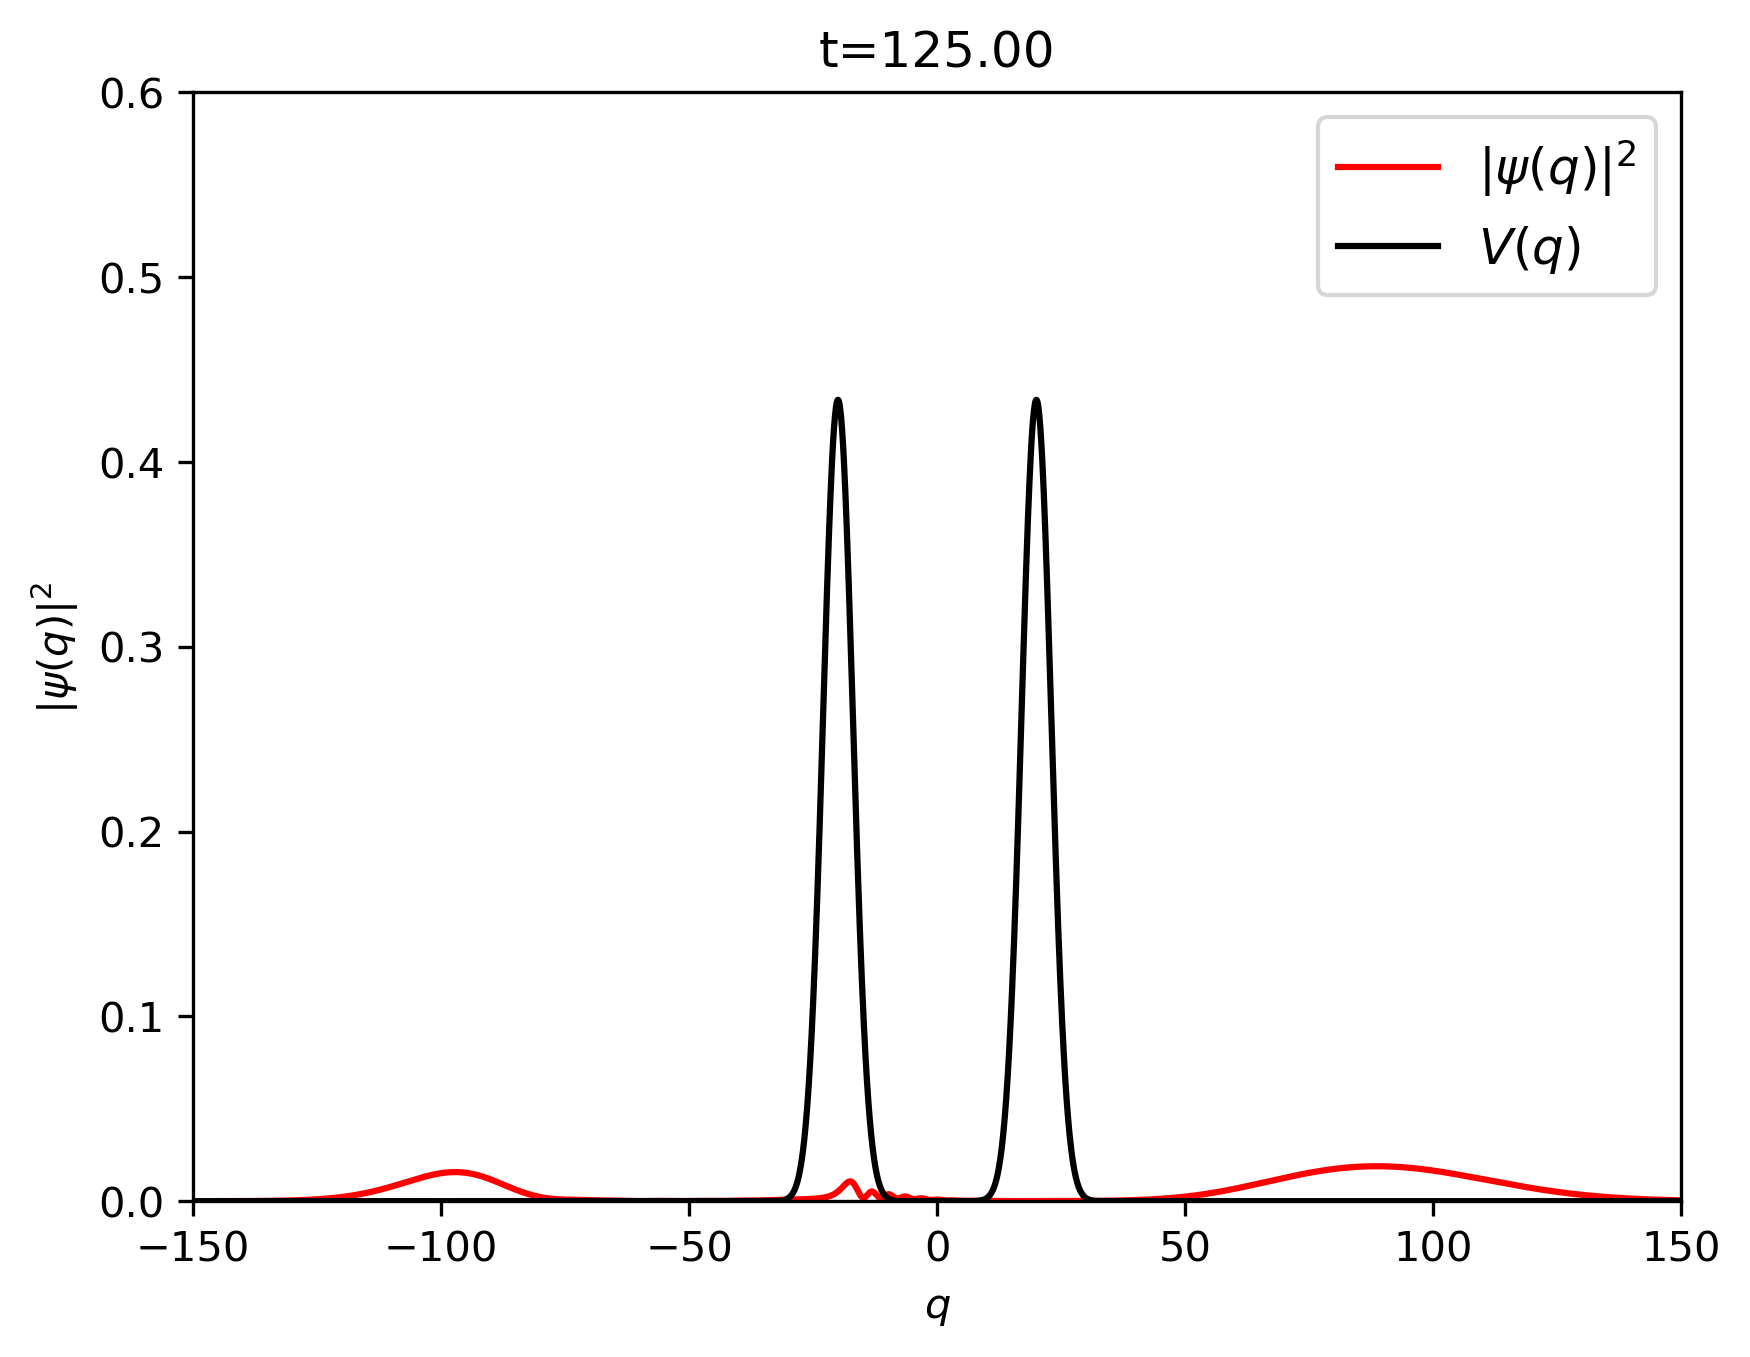

In [23]:
#creating the wave animation
#do save = 'True' to save or save='False' to play it in the notebook
xlim = (-150, 150)
ylim = (0,0.6)
save_wave(xlim=xlim, ylim=ylim, S=S, frames=frames, dt=dt, N_steps=N_steps, name='double_barrier_above', scaling = 1.5, save=True)

#### Run this cell to save the Wigner animation

In [11]:
#creating the wigner plot frames
xmin = -150
xmax = 150
ymin = -50
ymax = 50
psi_x0_input = psi_x0
for frame in range(frames):
    S = Schrodinger(x=x, psi_x0=psi_x0_input, V_x=V_x, hbar=hbar, m=m, k0=-28.0)
    wigner_plot(psi_x0_input, x, y, dx, dy, k0_ft_y, t_max, view = 230, limit = 10, xmin = xmin, xmax = xmax, ymin=ymin, ymax=ymax, save_fig = True, frame_num = frame, density = True, surface = False)
    S.time_step(dt, N_steps)
    psi_x0_input = S.psi_x
    
    
#animating the wigner plot frames
anim_wigner(density = True, surface = False)


### Beginning in Centre with $E<V_{0}$.

Saving Schrödinger object:

In [4]:
#specify x grid
N = 2 ** 11 #2048
dx = 0.1
x = np.arange(-250,250,0.1)
dy = dx
y = x

#potential barrier
def gauss_barrier(x, a, x0):
    x = np.asarray(x)
    return (a * np.sqrt(np.pi))** (-0.5) * np.exp(-0.5 * (((x-30) - x0)*1./a) ** 2) + (a * np.sqrt(np.pi))** (-0.5) * np.exp(-0.5 * (((x+30) - x0)*1./a) ** 2)

V_x = gauss_barrier(x, 3, 0)
V0 = np.max(V_x)

#potential 'walls' at either end
V_x[x < -248] = 1E6 
V_x[x > 248] = 1E6

#variables
dt = 0.01
N_steps = 50
t_max = 200
frames = 601

#specifying constants
hbar = 1.0  
m = 1.0 #mass    
p0 = np.sqrt(2 * m  * 0.75 * V0) #intial momentum
k0 = p0 / hbar #intial wave number
v0 = p0 / m #initial velocity
d = 4.0 #initial width of wavepacket
x0 = 0 #initial centre of wavepacket 
k0_ft_y = -np.pi / dy

#wavefunction
def gauss_x(x, a, x0, k0):
    #wave with width a, centred at x0 with momentum k0
    return((a * np.sqrt(np.pi)) ** (-0.5) * np.exp(-0.5 * ((x - x0) * 1. / a) ** 2 + 1j * x * k0))

psi_x0 = gauss_x(x, d, x0, k0)


#creating the schrodinger object
S = Schrodinger(x=x, psi_x0=psi_x0, V_x=V_x, hbar=hbar, m=m, k0=-28)

Animating wave:

Frames folder found, overwritting


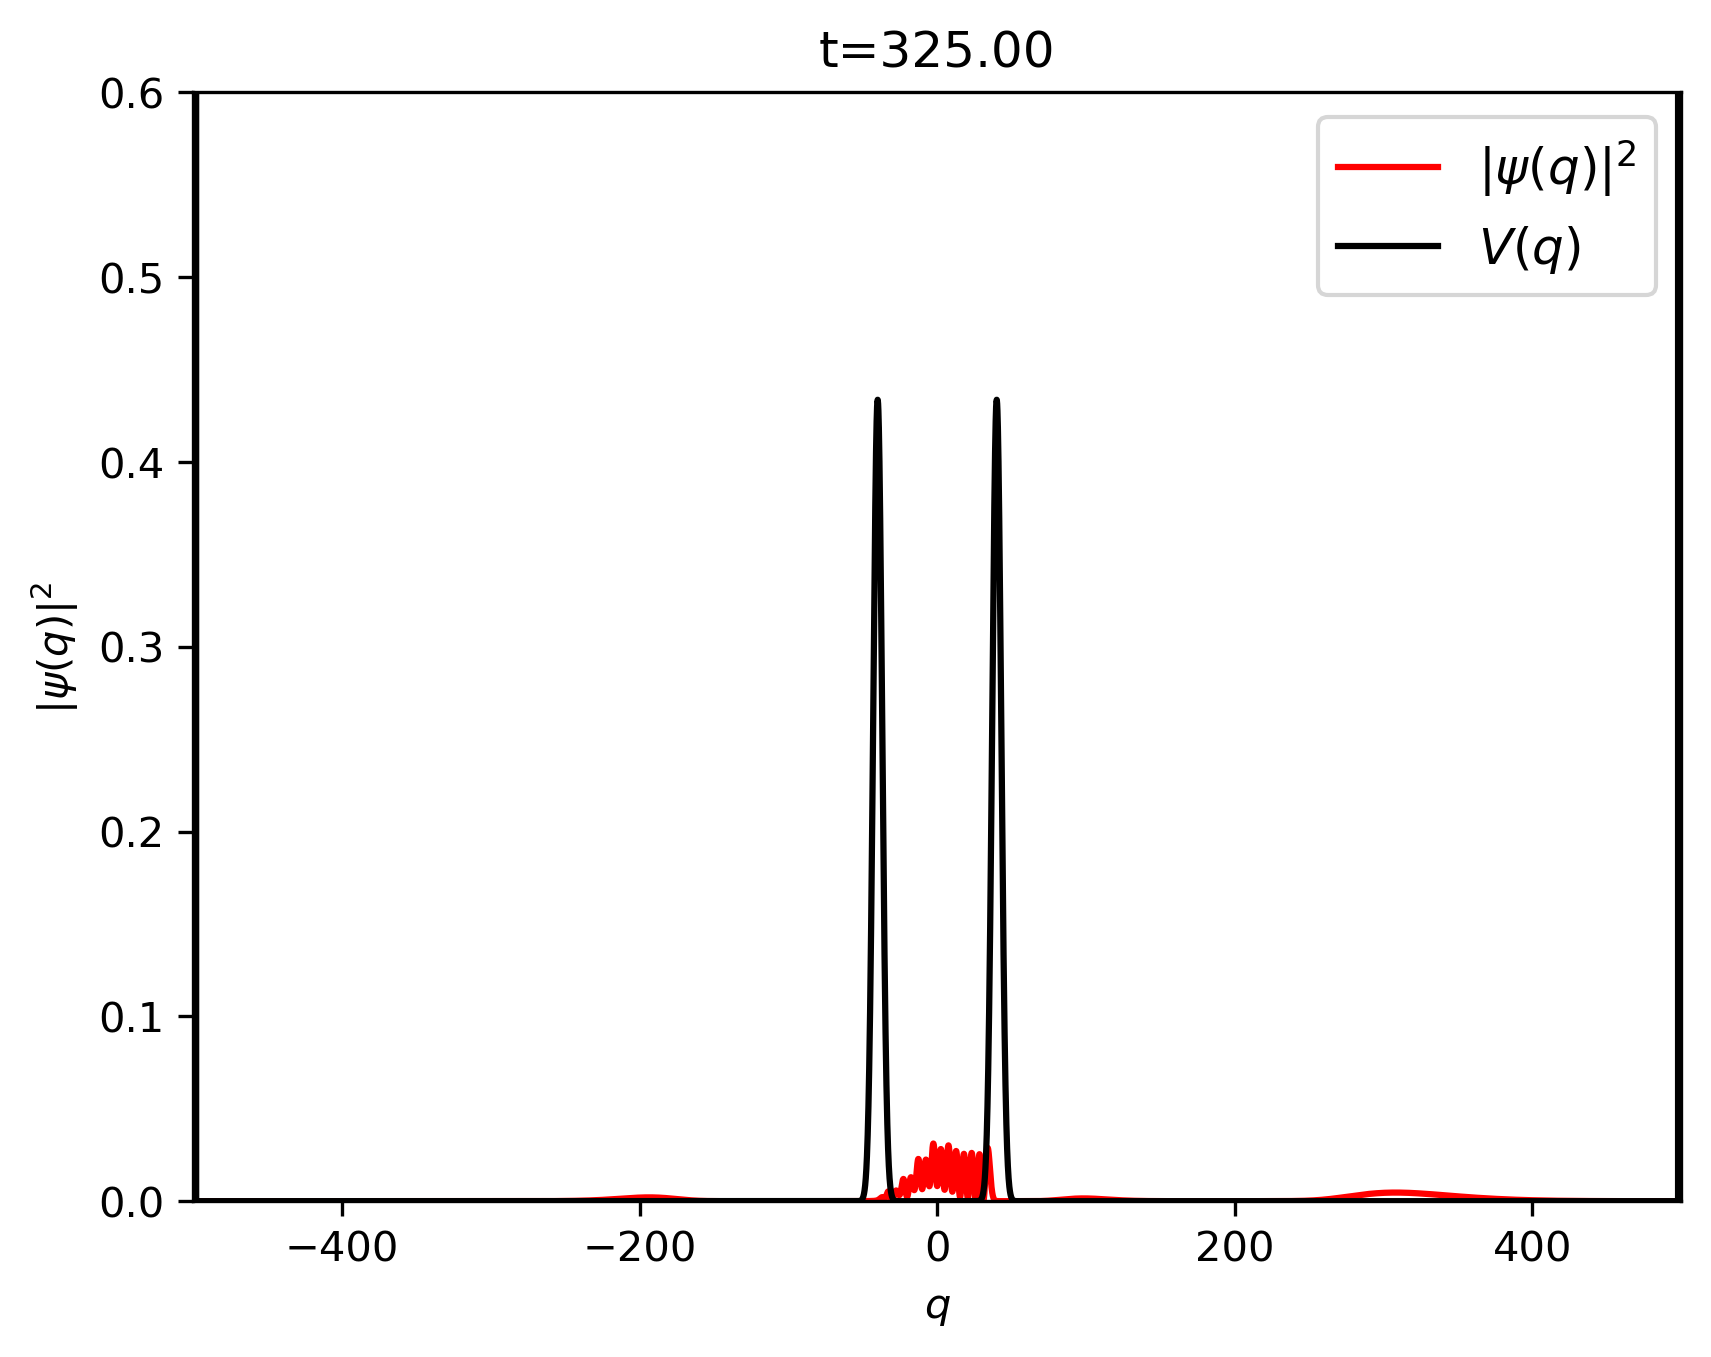

In [5]:
#creating the wave animation
#do save = 'True' to save or save='False' to play it in the notebook
xlim = (-200, 200)
ylim = (0,0.6)
save_wave(xlim=xlim, ylim=ylim, S=S, frames=frames, dt=dt, N_steps=N_steps, name='double_barrier_below', scaling = 1.5, save=True)

Wigner function:

In [ ]:
#creating the wigner plot frames
ymin = -50
ymax = 50

xmin = -150
xmax = 150
psi_x0_input = psi_x0
for frame in range(frames):
    S = Schrodinger(x=x, psi_x0=psi_x0_input, V_x=V_x, hbar=hbar, m=m, k0=-28.0)
    wigner_plot(psi_x0_input, x, y, dx, dy, k0_ft_y, t_max, view = 230, limit = 10, xmin = xmin, xmax = xmax, ymin=ymin, ymax=ymax, save_fig = True, frame_num = frame, density = True, surface = False)
    S.time_step(dt, N_steps)
    psi_x0_input = S.psi_x

    
#animating the wigner plot frames
anim_wigner(density = True, surface = False)


## Unequal Double Gaussian Barrier 

Here we have a potential barrier with two unequal peaks.

The larger one has a height of $V_{1}$ and the smaller one has a height of $V_{0} = \frac{1}{2}V_{1}$.

### $E<V_{0}$

In this example the wave as an energy $E$ below $V_{0}$ ( $\frac{3}{4}V_{0}$ to be exact ).

#### Run this Cell to save the wave evolution information in the object S

In [18]:
#specify x grid
N = 2 ** 11 #2048
dx = 0.1
x = np.arange(-300,300,0.1)
dy = dx
y = x

#potential barrier
def gauss_barrier(x, a, x0):
    x = np.asarray(x)
    return (a * np.sqrt(np.pi))** (-0.5) * np.exp(-0.5 * (((x-20) - x0)*1./a) ** 2)+ 0.5*(a * np.sqrt(np.pi))** (-0.5) * np.exp(-0.5 * (((x+20) - x0)*1./a) ** 2)

V_x = gauss_barrier(x, 3, 0)
V1 = np.max(V_x)
V0 = 0.5*np.max(V_x)

#potential 'walls' at either end
V_x[x < -298] = 1E6 
V_x[x > 298] = 1E6

#variables
dt = 0.01
N_steps = 50
t_max = 200
frames = 551

#specifying constants
hbar = 1.0  
m = 1.0 #mass    
p0 = np.sqrt(2 * m  * 0.5 * V0) #intial momentum
k0 = p0 / hbar #intial wave number
v0 = p0 / m #initial velocity
d = 4.0 #initial width of wavepacket
x0 = -40 #initial centre of wavepacket 
k0_ft_y = -np.pi / dy

#wavefunction
def gauss_x(x, a, x0, k0):
    #wave with width a, centred at x0 with momentum k0
    return((a * np.sqrt(np.pi)) ** (-0.5) * np.exp(-0.5 * ((x - x0) * 1. / a) ** 2 + 1j * x * k0))

psi_x0 = gauss_x(x, d, x0, k0)


#creating the schrodinger object
S = Schrodinger(x=x, psi_x0=psi_x0, V_x=V_x, hbar=hbar, m=m, k0=-28)

#### Run this cell to play / save the wave animation

Frames folder found, overwritting


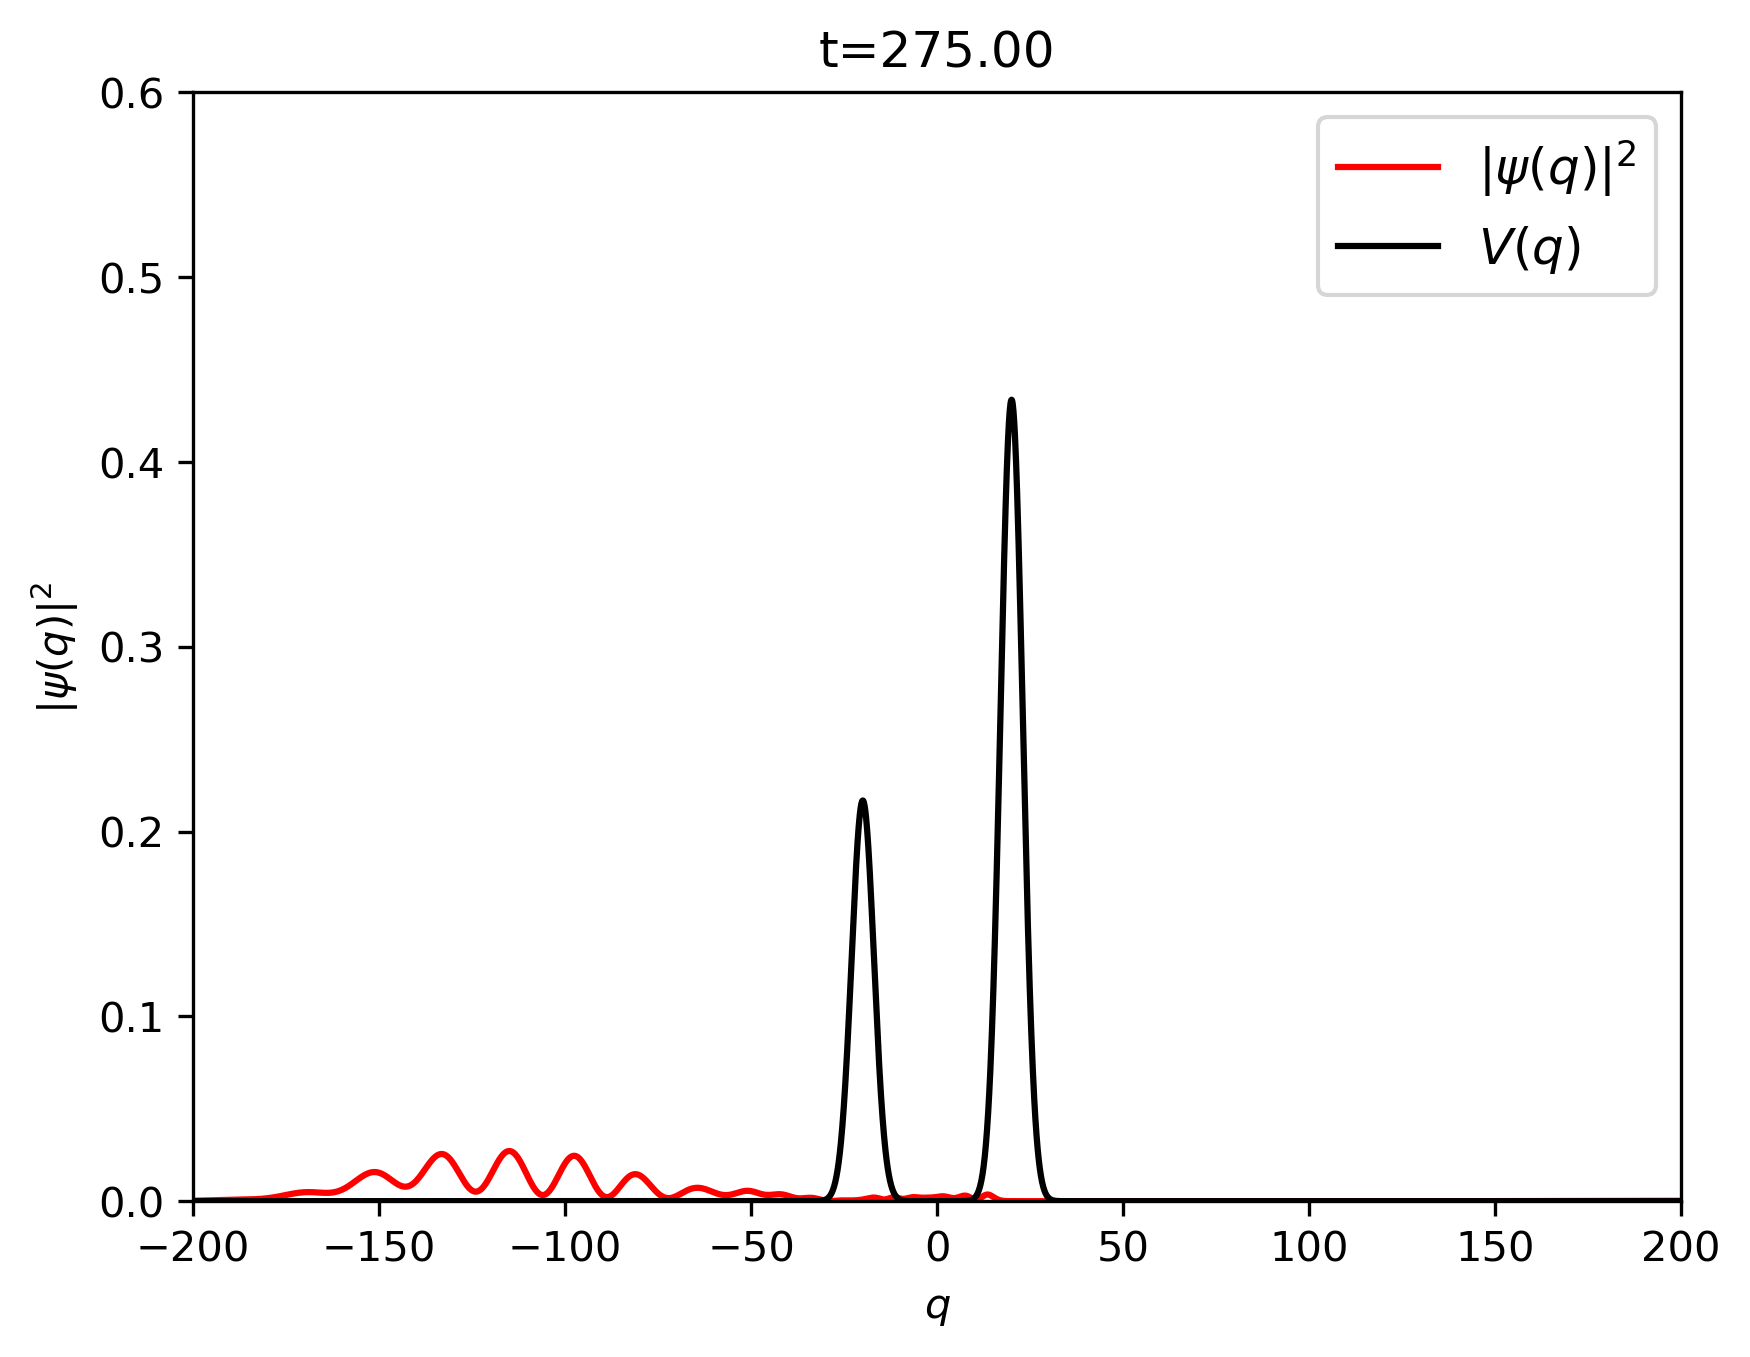

In [19]:
#creating the wave animation
#do save = 'True' to save or save='False' to play it in the notebook
xlim = (-200, 200)
ylim = (0,0.6)
save_wave(xlim=xlim, ylim=ylim, S=S, frames=frames, dt=dt, N_steps=N_steps, name='unequal_double_barrier_below', scaling = 1.5, save=True)

#### Run this cell to save the Wigner animation

In [20]:
#creating the wigner plot frames
xmin = -200
xmax = 200
ymin = -50
ymax = 50
psi_x0_input = psi_x0
for frame in range(frames):
    S = Schrodinger(x=x, psi_x0=psi_x0_input, V_x=V_x, hbar=hbar, m=m, k0=-28.0)
    wigner_plot(psi_x0_input, x, y, dx, dy, k0_ft_y, t_max, view = 230, limit = 10, xmin = xmin, xmax = xmax, ymin=ymin, ymax=ymax, save_fig = True, frame_num = frame, density = True, surface = False)
    S.time_step(dt, N_steps)
    psi_x0_input = S.psi_x
    
    
#animating the wigner plot frames
anim_wigner(density = True, surface = False)


### $V_{0}<E<V_{1}$

In this case the energy of the wave $E$ is exactly half way inbetween $V_{0}$ and $V_{1}$.

#### Run this Cell to save the wave evolution information in the object S

In [29]:
#specify x grid
N = 2 ** 11 #2048
dx = 0.1
x = np.arange(-350,350,0.1)
dy = dx
y = x

#potential barrier
def gauss_barrier(x, a, x0):
    x = np.asarray(x)
    return (a * np.sqrt(np.pi))** (-0.5) * np.exp(-0.5 * (((x-20) - x0)*1./a) ** 2)+ 0.5*(a * np.sqrt(np.pi))** (-0.5) * np.exp(-0.5 * (((x+20) - x0)*1./a) ** 2)

V_x = gauss_barrier(x, 3, 0)
V1 = np.max(V_x)
V0 = 0.5*np.max(V_x)
E = 0.5*(V0+V1)

#potential 'walls' at either end
V_x[x < -348] = 1E6 
V_x[x > 348] = 1E6

#variables
dt = 0.01
N_steps = 50
t_max = 200
frames = 551

#specifying constants
hbar = 1.0  
m = 1.0 #mass    
p0 = np.sqrt(2 * m  * E) #intial momentum
k0 = p0 / hbar #intial wave number
v0 = p0 / m #initial velocity
d = 4.0 #initial width of wavepacket
x0 = -40 #initial centre of wavepacket 
k0_ft_y = -np.pi / dy

#wavefunction
def gauss_x(x, a, x0, k0):
    #wave with width a, centred at x0 with momentum k0
    return((a * np.sqrt(np.pi)) ** (-0.5) * np.exp(-0.5 * ((x - x0) * 1. / a) ** 2 + 1j * x * k0))

psi_x0 = gauss_x(x, d, x0, k0)


#creating the schrodinger object
S = Schrodinger(x=x, psi_x0=psi_x0, V_x=V_x, hbar=hbar, m=m, k0=-28)

#### Run this cell to play / save the wave animation

Frames folder found, overwritting


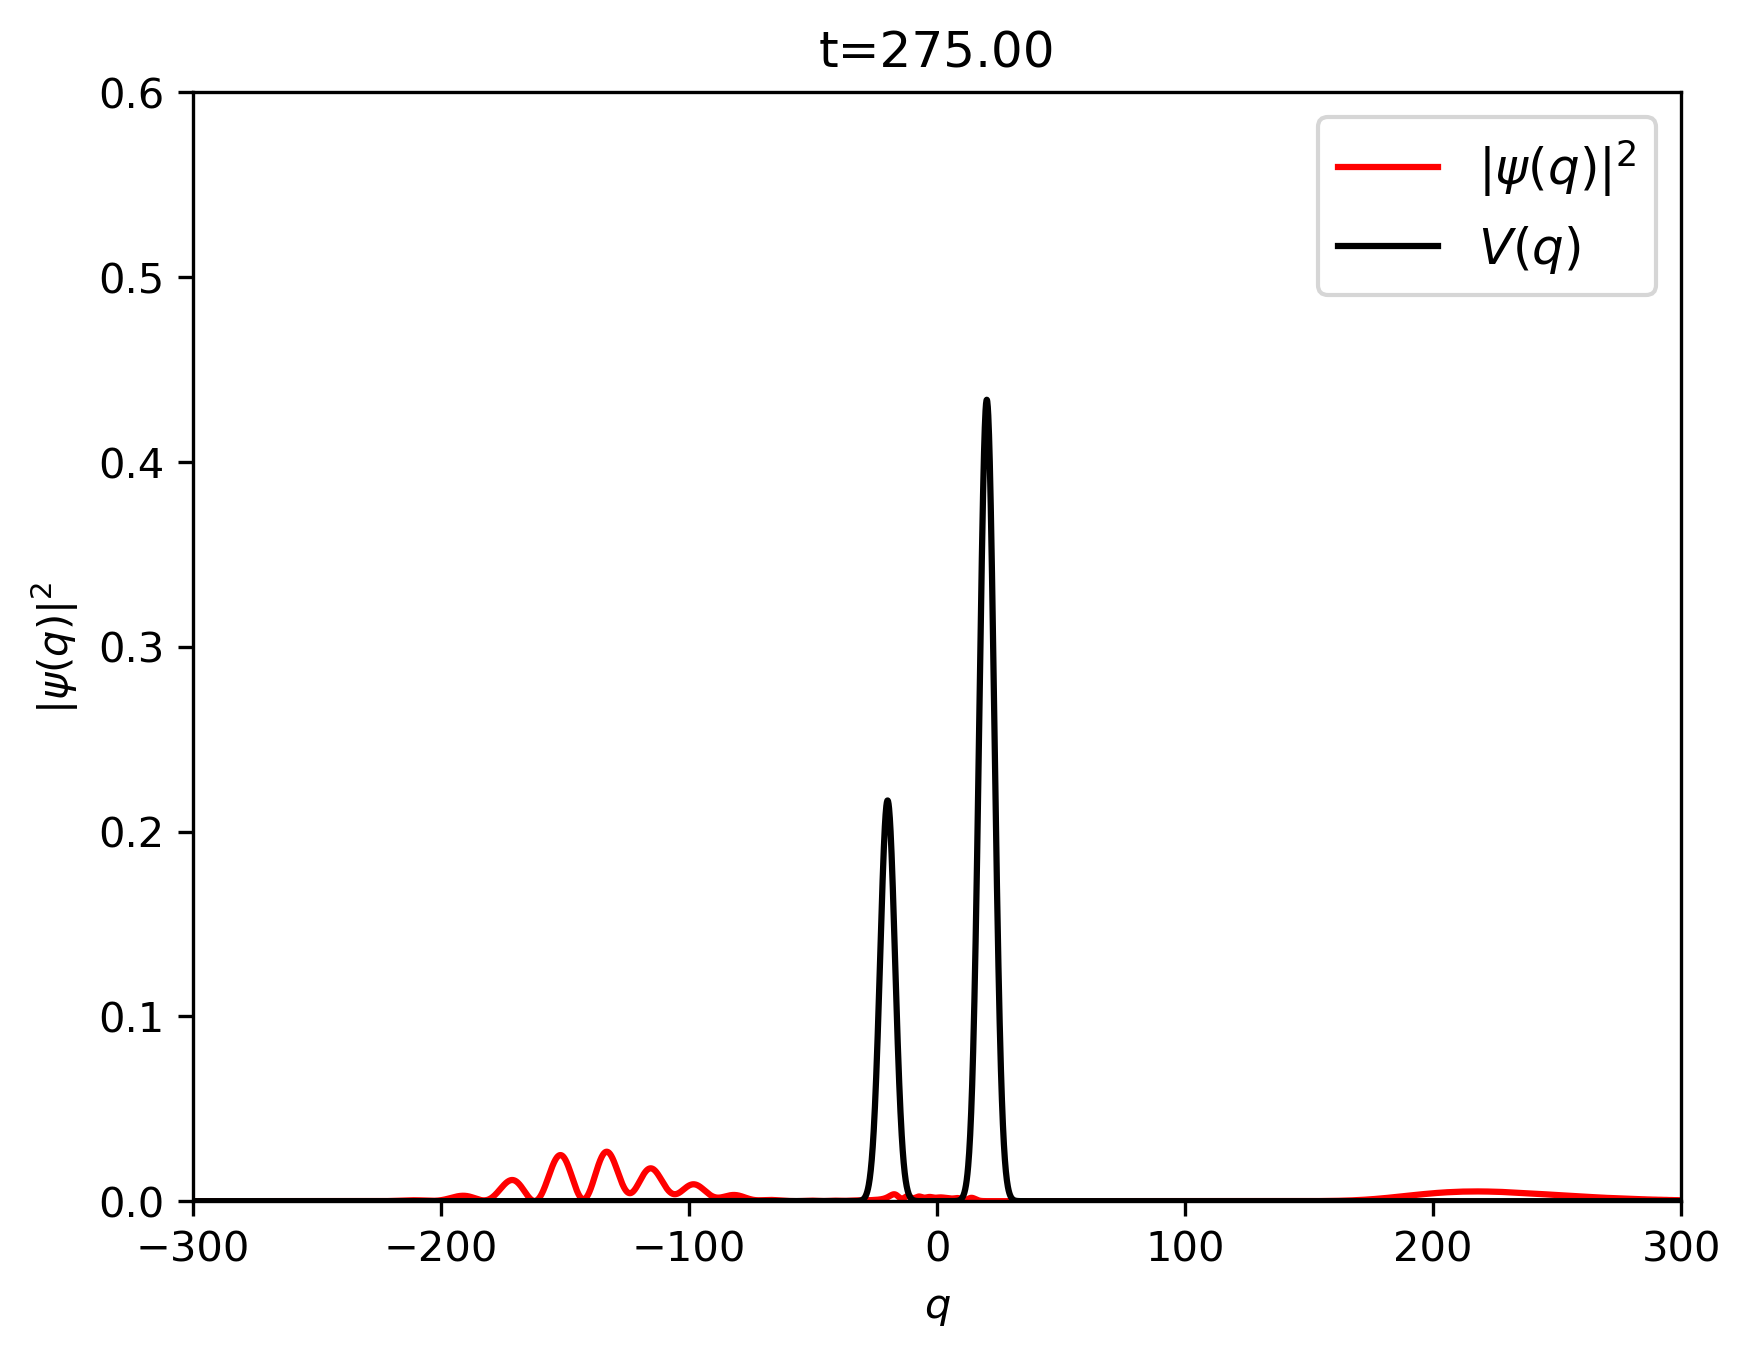

In [27]:
#creating the wave animation
#do save = 'True' to save or save='False' to play it in the notebook
xlim = (-300, 300)
ylim = (0,0.6)
save_wave(xlim=xlim, ylim=ylim, S=S, frames=frames, dt=dt, N_steps=N_steps, name='unequal_double_barrier_between', scaling = 1.5, save=True)

#### Run this cell to save the Wigner animation

In [28]:
#creating the wigner plot frames
xmin = -300
xmax = 300
ymin = -50
ymax = 50
psi_x0_input = psi_x0
for frame in range(frames):
    S = Schrodinger(x=x, psi_x0=psi_x0_input, V_x=V_x, hbar=hbar, m=m, k0=-28.0)
    wigner_plot(psi_x0_input, x, y, dx, dy, k0_ft_y, t_max, view = 230, limit = 10, xmin = xmin, xmax = xmax, ymin=ymin, ymax=ymax, save_fig = True, frame_num = frame, density = True, surface = False)
    S.time_step(dt, N_steps)
    psi_x0_input = S.psi_x
    
    
#animating the wigner plot frames
anim_wigner(density = True, surface = False)


### $E>V_{1}$

Here the energy of the wave is larger than the potential of the higher peak $V_{1}$.

#### Run this Cell to save the wave evolution information in the object S

In [ ]:
#specify x grid
N = 2 ** 11 #2048
dx = 0.1
x = np.arange(-350,350,0.1)
dy = dx
y = x

#potential barrier
def gauss_barrier(x, a, x0):
    x = np.asarray(x)
    return (a * np.sqrt(np.pi))** (-0.5) * np.exp(-0.5 * (((x-20) - x0)*1./a) ** 2)+ 0.5*(a * np.sqrt(np.pi))** (-0.5) * np.exp(-0.5 * (((x+20) - x0)*1./a) ** 2)

V_x = gauss_barrier(x, 3, 0)
V1 = np.max(V_x)
V0 = 0.5*np.max(V_x)

#potential 'walls' at either end
V_x[x < -348] = 1E6 
V_x[x > 348] = 1E6

#variables
dt = 0.01
N_steps = 50
t_max = 200
frames = 551

#specifying constants
hbar = 1.0  
m = 1.0 #mass    
p0 = np.sqrt(2 * m  * 1.25 * V1) #intial momentum
k0 = p0 / hbar #intial wave number
v0 = p0 / m #initial velocity
d = 4.0 #initial width of wavepacket
x0 = -40 #initial centre of wavepacket 
k0_ft_y = -np.pi / dy

#wavefunction
def gauss_x(x, a, x0, k0):
    #wave with width a, centred at x0 with momentum k0
    return((a * np.sqrt(np.pi)) ** (-0.5) * np.exp(-0.5 * ((x - x0) * 1. / a) ** 2 + 1j * x * k0))

psi_x0 = gauss_x(x, d, x0, k0)


#creating the schrodinger object
S = Schrodinger(x=x, psi_x0=psi_x0, V_x=V_x, hbar=hbar, m=m, k0=-28)

#### Run this cell to play / save the wave animation

In [ ]:
#creating the wave animation
#do save = 'True' to save or save='False' to play it in the notebook
xlim = (-350, 350)
ylim = (0,0.6)
save_wave(xlim=xlim, ylim=ylim, S=S, frames=frames, dt=dt, N_steps=N_steps, name='unequal_double_barrier_above', scaling = 1.5, save=True)

#### Run this cell to save the Wigner animation

In [ ]:
#creating the wigner plot frames
xmin = -300
xmax = 300
ymin = -50
ymax = 50
psi_x0_input = psi_x0
for frame in range(frames):
    S = Schrodinger(x=x, psi_x0=psi_x0_input, V_x=V_x, hbar=hbar, m=m, k0=-28.0)
    wigner_plot(psi_x0_input, x, y, dx, dy, k0_ft_y, t_max, view = 230, limit = 10, xmin = xmin, xmax = xmax, ymin=ymin, ymax=ymax, save_fig = True, frame_num = frame, density = True, surface = False)
    S.time_step(dt, N_steps)
    psi_x0_input = S.psi_x
    
    
#animating the wigner plot frames
anim_wigner(density = True, surface = False)


### Beginning in the centre with $E<V_{0}$.

Schrödinger object:

In [19]:
#specify x grid
N = 2 ** 11 #2048
dx = 0.1
x = np.arange(-300,300,0.1)
dy = dx
y = x

#potential barrier
def gauss_barrier(x, a, x0):
    x = np.asarray(x)
    return (a * np.sqrt(np.pi))** (-0.5) * np.exp(-0.5 * (((x-30) - x0)*1./a) ** 2)+ 0.5*(a * np.sqrt(np.pi))** (-0.5) * np.exp(-0.5 * (((x+30) - x0)*1./a) ** 2)

V_x = gauss_barrier(x, 3, 0)
V1 = np.max(V_x)
V0 = 0.5*np.max(V_x)

#potential 'walls' at either end
V_x[x < -298] = 1E6 
V_x[x > 298] = 1E6

#variables
dt = 0.01
N_steps = 50
t_max = 200
frames = 601

#specifying constants
hbar = 1.0  
m = 1.0 #mass    
p0 = np.sqrt(2 * m  * 0.5 * V0) #intial momentum
k0 = p0 / hbar #intial wave number
v0 = p0 / m #initial velocity
d = 4.0 #initial width of wavepacket
x0 = 0 #initial centre of wavepacket 
k0_ft_y = -np.pi / dy

#wavefunction
def gauss_x(x, a, x0, k0):
    #wave with width a, centred at x0 with momentum k0
    return((a * np.sqrt(np.pi)) ** (-0.5) * np.exp(-0.5 * ((x - x0) * 1. / a) ** 2 + 1j * x * k0))

psi_x0 = gauss_x(x, d, x0, k0)


#creating the schrodinger object
S = Schrodinger(x=x, psi_x0=psi_x0, V_x=V_x, hbar=hbar, m=m, k0=-28)

Saving wave animation:

Frames folder found, overwritting


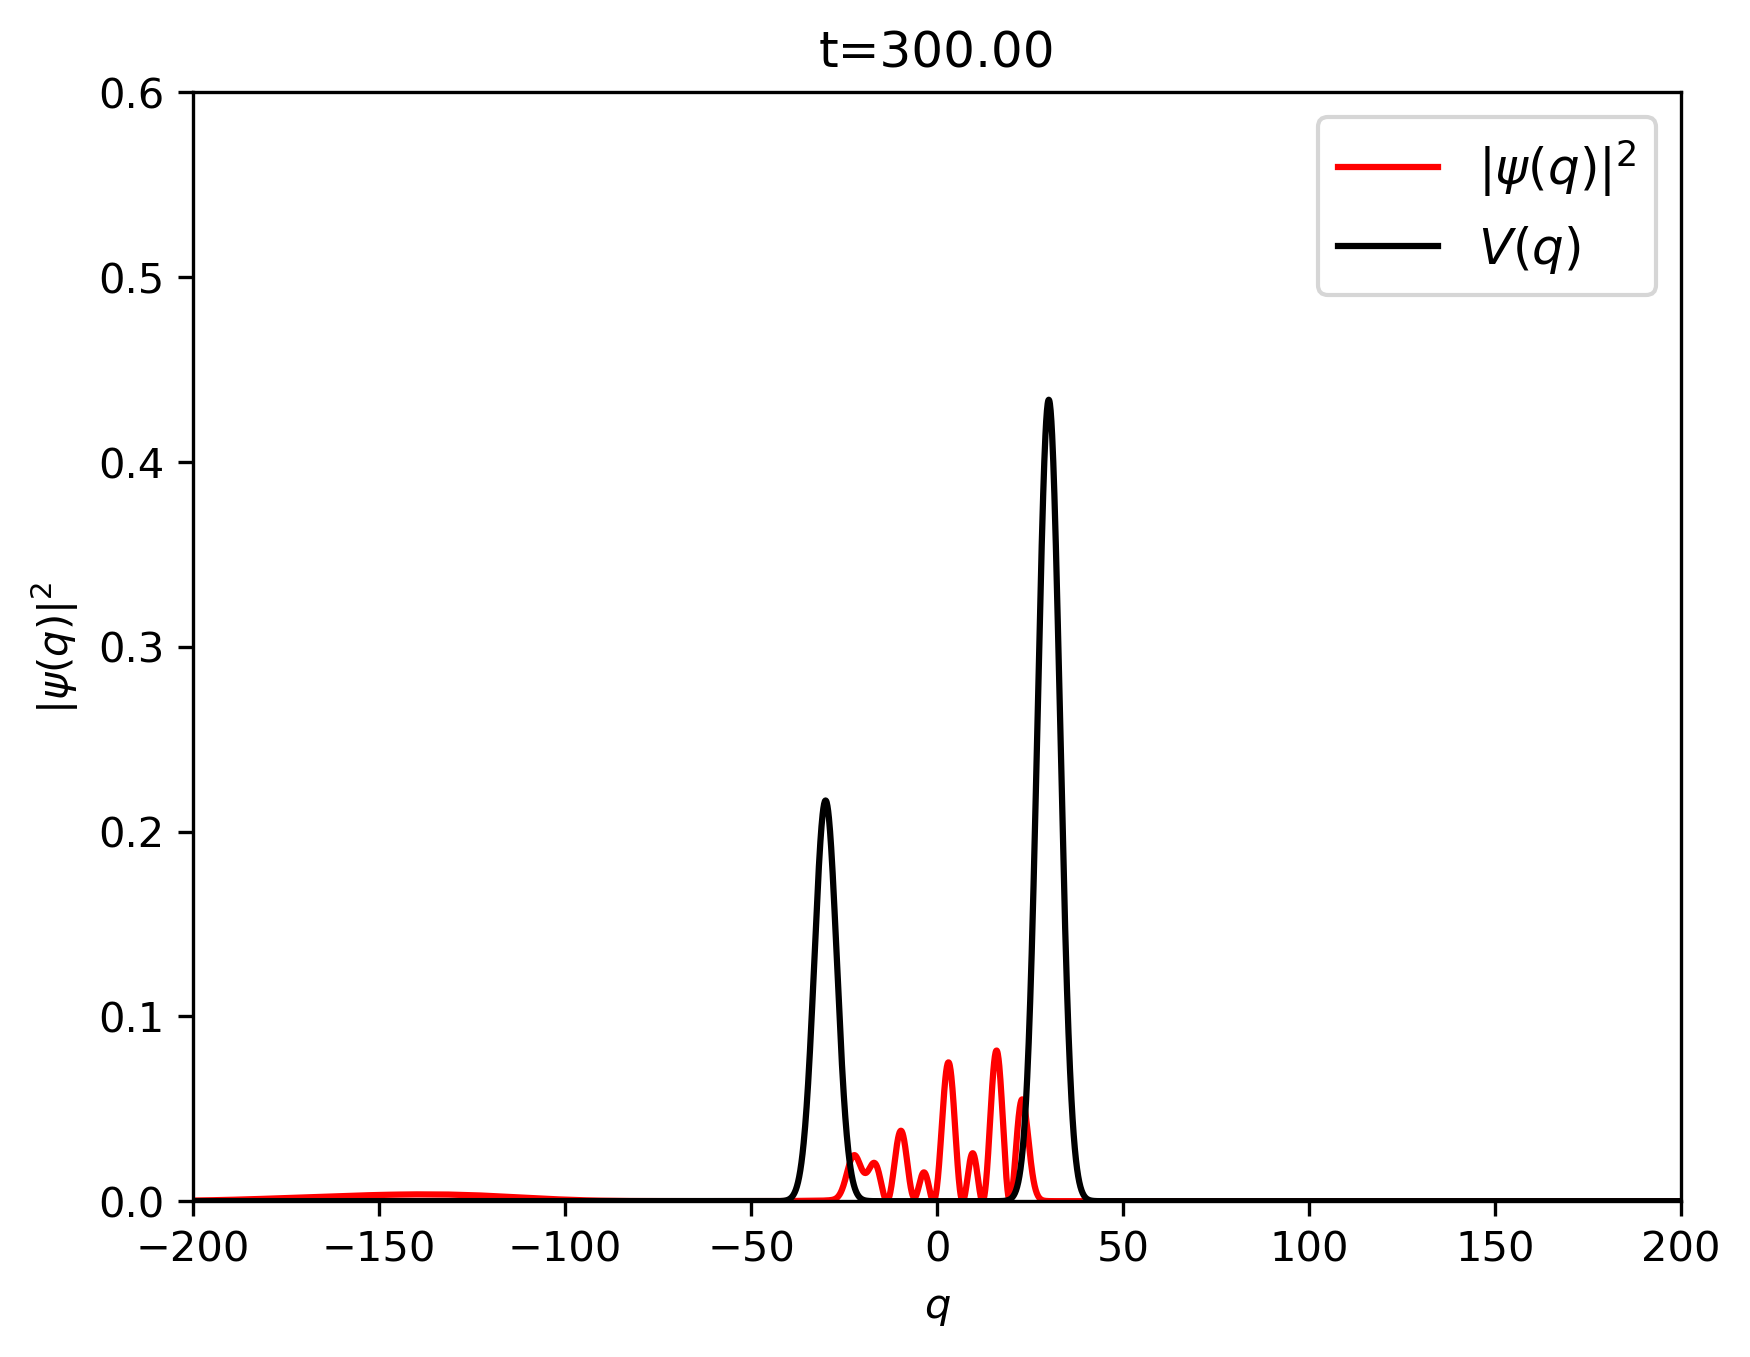

In [18]:
#creating the wave animation
#do save = 'True' to save or save='False' to play it in the notebook
xlim = (-200, 200)
ylim = (0,0.6)
save_wave(xlim=xlim, ylim=ylim, S=S, frames=frames, dt=dt, N_steps=N_steps, name='unequal_double_barrier_well', scaling = 1.5, save=True)

Wigner function:

In [20]:
#creating the wigner plot frames
xmin = -200
xmax = 200
ymin = -50
ymax = 50
psi_x0_input = psi_x0
for frame in range(frames):
    S = Schrodinger(x=x, psi_x0=psi_x0_input, V_x=V_x, hbar=hbar, m=m, k0=-28.0)
    wigner_plot(psi_x0_input, x, y, dx, dy, k0_ft_y, t_max, view = 230, limit = 10, xmin = xmin, xmax = xmax, ymin=ymin, ymax=ymax, save_fig = True, frame_num = frame, density = True, surface = False)
    S.time_step(dt, N_steps)
    psi_x0_input = S.psi_x
    
    
#animating the wigner plot frames
anim_wigner(density = True, surface = False)


Frames folder found, overwritting


fini.